# Investigating into UK's one of most significant environmental issue - E-Waste 
##### This notebook provides the source code for the project which is a requirement for the module COMP757 DAV 36303 WIN 202320
#### Author: Haris Ahmed Qureshi

#### **Source of dataset:** 
https://www.gov.uk/government/statistical-data-sets/waste-electrical-and-electronic-equipment-weee-in-the-uk
* Report Name: WEEE collected in the UK
* Report Ref: LIT 7676

#### **Dataset description:**
The dataset is about “waste electrical and electronic equipment (WEEE) in the UK”, it shows how much e-waste was collected from the year 2011 to 2023. 

In [1]:
import pandas as pd

file_path = 'dav-ewaste-dataset.xlsx'  
df = pd.read_excel(file_path)

df.head(14)

,Category Name,Household WEEE collected from a DCF (tonnes),Household WEEE returned under regulation 43 (tonnes),Household WEEE returned under regulation 50 (tonnes),Year,Quarter
0,Large Household Appliances,15168.056,22521.722,4270.945,2023,1
1,Small Household Appliances,6765.395,225.949,1240.409,2023,1
2,IT and Telcomms Equipment,6046.290,381.990,3258.199,2023,1
3,Consumer Equipment,4199.558,59.879,808.174,2023,1
4,Lighting Equipment,1133.253,30.636,175.119,2023,1
5,Electrical and Electronic Tools,5343.848,90.834,593.203,2023,1
6,Toys Leisure and Sports,1061.908,20.614,121.552,2023,1
7,Medical Devices,0.005,0.289,2.936,2023,1
8,Monitoring and Control Instruments,215.448,9.458,53.511,2023,1
9,Automatic Dispensers,0.000,0.003,0.000,2023,1


# Level 1: Descriptive Statistical Analysis

In [2]:
df.describe()


,Household WEEE collected from a DCF (tonnes),Household WEEE returned under regulation 43 (tonnes),Household WEEE returned under regulation 50 (tonnes),Year,Quarter
count,728.000000,728.000000,728.000000,728.00000,728.000000
mean,5932.233646,1856.244562,1076.315596,2017.00000,2.500000
std,7858.060925,4916.644645,1541.675529,3.74423,1.118803
min,0.000000,0.000000,0.000000,2011.00000,1.000000
25%,6.350750,0.843500,6.797250,2014.00000,1.750000
50%,1547.058000,55.301500,369.300500,2017.00000,2.500000
75%,8194.035250,259.009750,1435.959000,2020.00000,3.250000
max,33408.650000,28094.906000,12289.268000,2023.00000,4.000000


In [3]:
df.dtypes

Category Name                                            object
Household WEEE collected from a DCF (tonnes)            float64
Household WEEE returned under regulation 43 (tonnes)    float64
Household WEEE returned under regulation 50 (tonnes)    float64
Year                                                      int64
Quarter                                                   int64
dtype: object

After looking at the first few 14 rows, we can understand the data's structure and its columns. 

1. Category Name: Type of e-waste, e.g., Large Household Appliances, Small Household Appliances, etc.
2. Household WEEE collected from a DCF (tonnes)
3. Household WEEE returned under regulation 43 (tonnes)
4. Household WEEE returned under regulation 50 (tonnes)
5. Year: The year the data was collected, e.g., 2023.
6. Quarter: The quarter of the year the data represents, with values ranging from 1 to 4.


In [4]:
df['Total E-Waste (tonnes)'] = df[['Household WEEE collected from a DCF (tonnes)', 'Household WEEE returned under regulation 43 (tonnes)', 'Household WEEE returned under regulation 50 (tonnes)']].sum(axis=1)

descriptive_stats = df.describe().transpose()

descriptive_stats['range'] = descriptive_stats['max'] - descriptive_stats['min']

print(descriptive_stats)


                                                    count         mean  \
Household WEEE collected from a DCF (tonnes)        728.0  5932.233646   
Household WEEE returned under regulation 43 (to...  728.0  1856.244562   
Household WEEE returned under regulation 50 (to...  728.0  1076.315596   
Year                                                728.0  2017.000000   
Quarter                                             728.0     2.500000   
Total E-Waste (tonnes)                              728.0  8864.793804   

                                                             std     min  \
Household WEEE collected from a DCF (tonnes)         7858.060925     0.0   
Household WEEE returned under regulation 43 (to...   4916.644645     0.0   
Household WEEE returned under regulation 50 (to...   1541.675529     0.0   
Year                                                    3.744230  2011.0   
Quarter                                                 1.118803     1.0   
Total E-Waste (tonnes)   

***Level 1 Statistical Analysis***

Which involves descriptive statistics to understand the dataset better. This includes measures like mean, median, mode, standard deviation, and range for the numerical columns.

***Level 1: Descriptive Statistics***
Computing the descriptive statistics for the numerical columns of the dataset will give us an overview of the central tendency, dispersion, and shape of the dataset's distribution.

***Level 1 Statistical Analysis Results***
The descriptive statistics provide an overview of the dataset's numerical features:

1. Household WEEE collected from a DCF (tonnes):
    1. Mean: 5932.23 tonnes
    2. Standard Deviation: 7858.06 tonnes
    3. Range: 0 to 33408.65 tonnes
2. Household WEEE returned under regulation 43 (tonnes):
    1. Mean: 1856.24 tonnes
    2. Standard Deviation: 4916.64 tonnes
    3. Range: 0 to 28094.91 tonnes
3. Household WEEE returned under regulation 50 (tonnes):
    1. Mean: 1076.32 tonnes
    2. Standard Deviation: 1541.68 tonnes
    3. Range: 0 to 12289.27 tonnes
4. Year:
    1. Range: 2011 to 2023
5. Quarter:
    1. Mean: 2.5 (indicating an even distribution across quarters)

# Level 2: Inferential Statistical Analysis

### 1. Check if there is a correlation between Large Household Appliance's generated waste and Years?

In [5]:
large_appliances_df = df[df['Category Name'] == 'Large Household Appliances']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Large Household Appliances':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Large Household Appliances': 0.3268541036840822


### 2. Check if there is a correlation between Small Household Appliance's generated waste and Years?

In [6]:
large_appliances_df = df[df['Category Name'] == 'Large Household Appliances']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Large Household Appliances':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Large Household Appliances': 0.3268541036840822


### 3. Check if there is a correlation between IT and Telcomms Equipment's generated waste and Years?

In [7]:
large_appliances_df = df[df['Category Name'] == 'IT and Telcomms Equipment']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'IT and Telcomms Equipment':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'IT and Telcomms Equipment': 0.11958430566995468


### 4. Check if there is a correlation between Consumer Equipment's generated waste and Years?

In [8]:
large_appliances_df = df[df['Category Name'] == 'Consumer Equipment']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Consumer Equipment':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Consumer Equipment': -0.6330991580800127


### 5. Check if there is a correlation between Lighting Equipment's generated waste and Years?

In [9]:
large_appliances_df = df[df['Category Name'] == 'Lighting Equipment']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Lighting Equipment':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Lighting Equipment': 0.8304416119061148


### 6. Check if there is a correlation between Electrical and Electronic Tools's generated waste and Years?

In [10]:
large_appliances_df = df[df['Category Name'] == 'Electrical and Electronic Tools']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Electrical and Electronic Tools':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Electrical and Electronic Tools': 0.8967862998234497


### 7. Check if there is a correlation between Toys Leisure and Sports' generated waste and Years?

In [11]:
large_appliances_df = df[df['Category Name'] == 'Toys Leisure and Sports']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Toys Leisure and Sports':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Toys Leisure and Sports': 0.7349536122970282


### 8. Check if there is a correlation between Medical Device's generated waste and Years?

In [12]:
large_appliances_df = df[df['Category Name'] == 'Medical Devices']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Medical Devices':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Medical Devices': 0.17090554419624196


### 9. Check if there is a correlation between Monitoring and Control Instrument's generated waste and Years?

In [13]:
display_equipment_df = df[df['Category Name'] == 'Monitoring and Control Instruments']

yearly_totals_display_equipment = display_equipment_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient_display = yearly_totals_display_equipment['Year'].corr(yearly_totals_display_equipment['Total E-Waste (tonnes)'])

print("Correlation coefficient for 'Monitoring and Control Instruments':", correlation_coefficient_display)

Correlation coefficient for 'Monitoring and Control Instruments': 0.8516981772381528


### 10. Check if there is a correlation between Automatic Dispenser's generated waste and Years?

In [14]:
large_appliances_df = df[df['Category Name'] == 'Automatic Dispensers']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Automatic Dispensers':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Automatic Dispensers': -0.17832868213362735


### 11. Check if there is a correlation between Display Equipment's generated waste and Years?

In [15]:
display_equipment_df = df[df['Category Name'] == 'Display Equipment']

yearly_totals_display_equipment = display_equipment_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient_display = yearly_totals_display_equipment['Year'].corr(yearly_totals_display_equipment['Total E-Waste (tonnes)'])

print("Correlation coefficient for 'Display Equipment':", correlation_coefficient_display)

Correlation coefficient for 'Display Equipment': -0.9108773300494032


### 12. Check if there is a correlation between Cooling Appliances Containing Refrigerant's generated waste and Years?

In [16]:
large_appliances_df = df[df['Category Name'] == 'Cooling Appliances Containing Refrigerants']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Cooling Appliances Containing Refrigerants':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Cooling Appliances Containing Refrigerants': 0.8330839570412533


### 13. Check if there is a correlation between Gas Discharge Lamps and LED Light Source's generated waste and Years?

In [17]:
large_appliances_df = df[df['Category Name'] == 'Gas Discharge Lamps and LED Light Sources']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Gas Discharge Lamps and LED Light Sources':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Gas Discharge Lamps and LED Light Sources': -0.10977452956029346


### 14. Check if there is a correlation between Photovoltaic Panel's generated waste and Years?

In [18]:
large_appliances_df = df[df['Category Name'] == 'Photovoltaic Panels']

yearly_totals_large_appliances = large_appliances_df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

correlation_coefficient = yearly_totals_large_appliances['Year'].corr(yearly_totals_large_appliances['Total E-Waste (tonnes)'])

print("Correlation coefficient between Year and Total E-Waste for 'Photovoltaic Panels':", correlation_coefficient)


Correlation coefficient between Year and Total E-Waste for 'Photovoltaic Panels': 0.8937954772442775


### Summary of correlation between generated waste and as time progressed (years)

In [19]:
import pandas as pd

data = {
    'Category': [
        'Large Household Appliances', 'Small Household Appliances', 'IT and Telcomms Equipment',
        'Consumer Equipment', 'Lighting Equipment', 'Electrical and Electronic Tools', 'Toys Leisure and Sports',
        'Medical Devices', 'Monitoring and Control Instruments', 'Automatic Dispensers', 'Display Equipment',
        'Cooling Appliances Containing Refrigerants', 'Gas Discharge Lamps and LED Light Sources', 'Photovoltaic Panels'
    ],
    'Correlation Coefficient': [
        0.3268541036840822, -0.038596845732656544, 0.11958430566995468, -0.6330991580800127, 0.8304416119061148,
        0.8967862998234497, 0.7349536122970282, 0.17090554419624196, 0.8516981772381528, -0.17832868213362735,
        -0.9108773300494032, 0.8330839570412533, -0.10977452956029346, 0.8937954772442775
    ]
}

df_correlation = pd.DataFrame(data)
df_correlation['Absolute Correlation'] = df_correlation['Correlation Coefficient'].abs()

df_sorted = df_correlation.sort_values(by='Absolute Correlation', ascending=False).drop('Absolute Correlation', axis=1)

df_sorted.head(15)


,Category,Correlation Coefficient
10,Display Equipment,-0.910877
5,Electrical and Electronic Tools,0.896786
13,Photovoltaic Panels,0.893795
8,Monitoring and Control Instruments,0.851698
11,Cooling Appliances Containing Refrigerants,0.833084
4,Lighting Equipment,0.830442
6,Toys Leisure and Sports,0.734954
3,Consumer Equipment,-0.633099
0,Large Household Appliances,0.326854
9,Automatic Dispensers,-0.178329


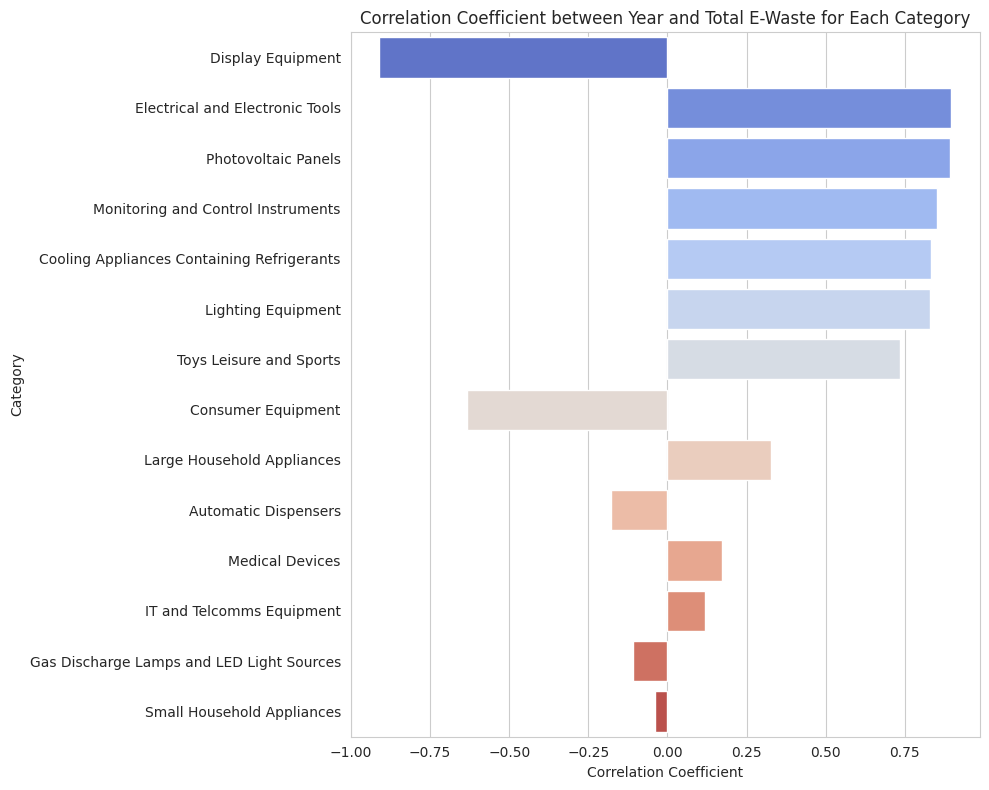

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation Coefficient', y='Category', data=df_sorted, palette='coolwarm')
plt.title('Correlation Coefficient between Year and Total E-Waste for Each Category')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


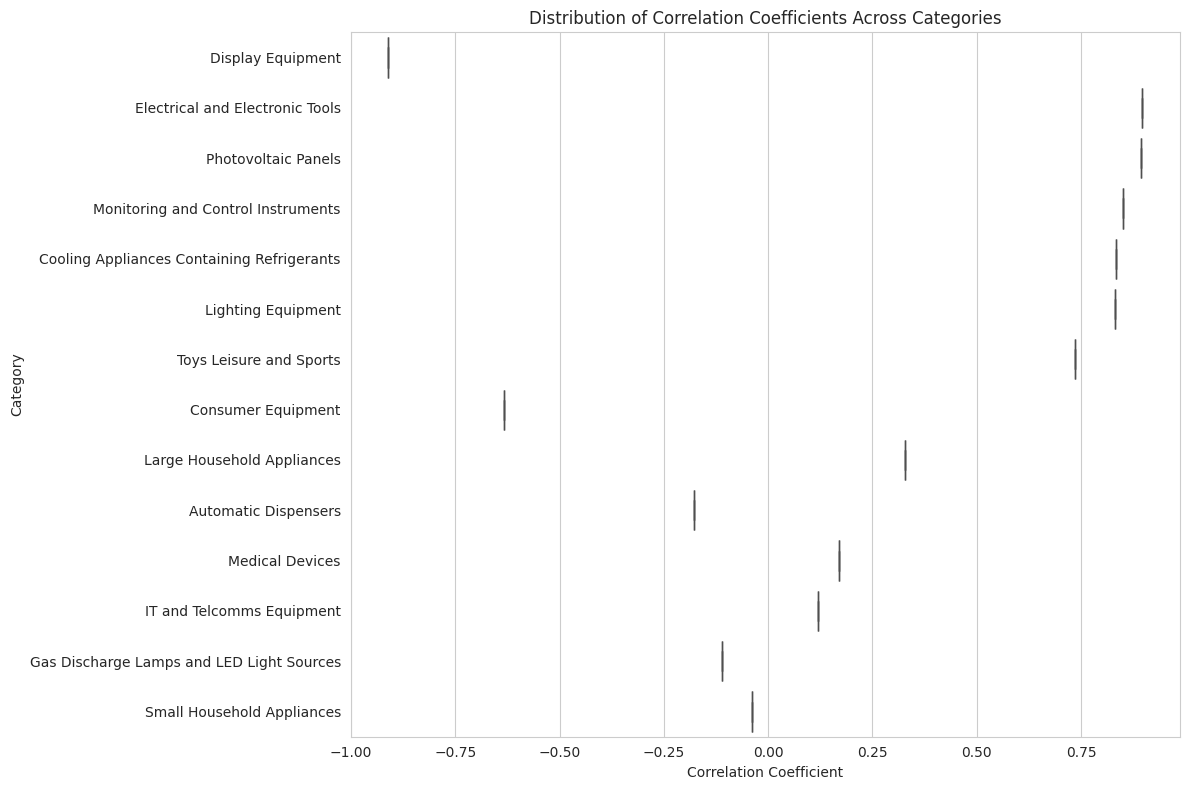

In [52]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Correlation Coefficient', y='Category', data=df_sorted, orient='h', palette='coolwarm')
plt.title('Distribution of Correlation Coefficients Across Categories')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


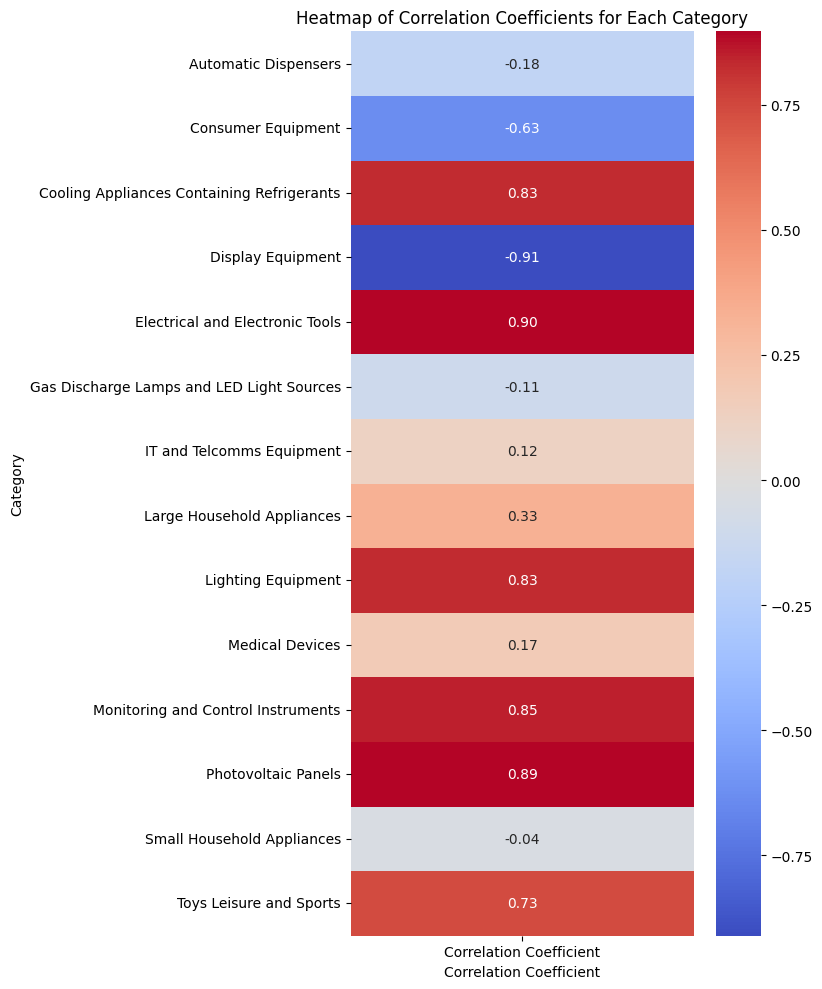

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

heatmap_data = pd.pivot_table(df_sorted, values='Correlation Coefficient', index='Category', aggfunc=np.mean)

plt.figure(figsize=(8, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Heatmap of Correlation Coefficients for Each Category')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


#### Find if there is a trend between the four quarters and the e-waste generated.

Whether there is a trend between the four quarters of the year for all categories, such as if e-waste generation increases in a specific quarter, we can perform an analysis that focuses on quarterly trends across all categories;

1. Aggregating e-waste data by category and quarter across all years.
2. Visualizing the data to identify patterns, such as increases or decreases in e-waste generation during specific quarters.
3. Statistical analysis, if necessary, to quantify the trends or differences between quarters.

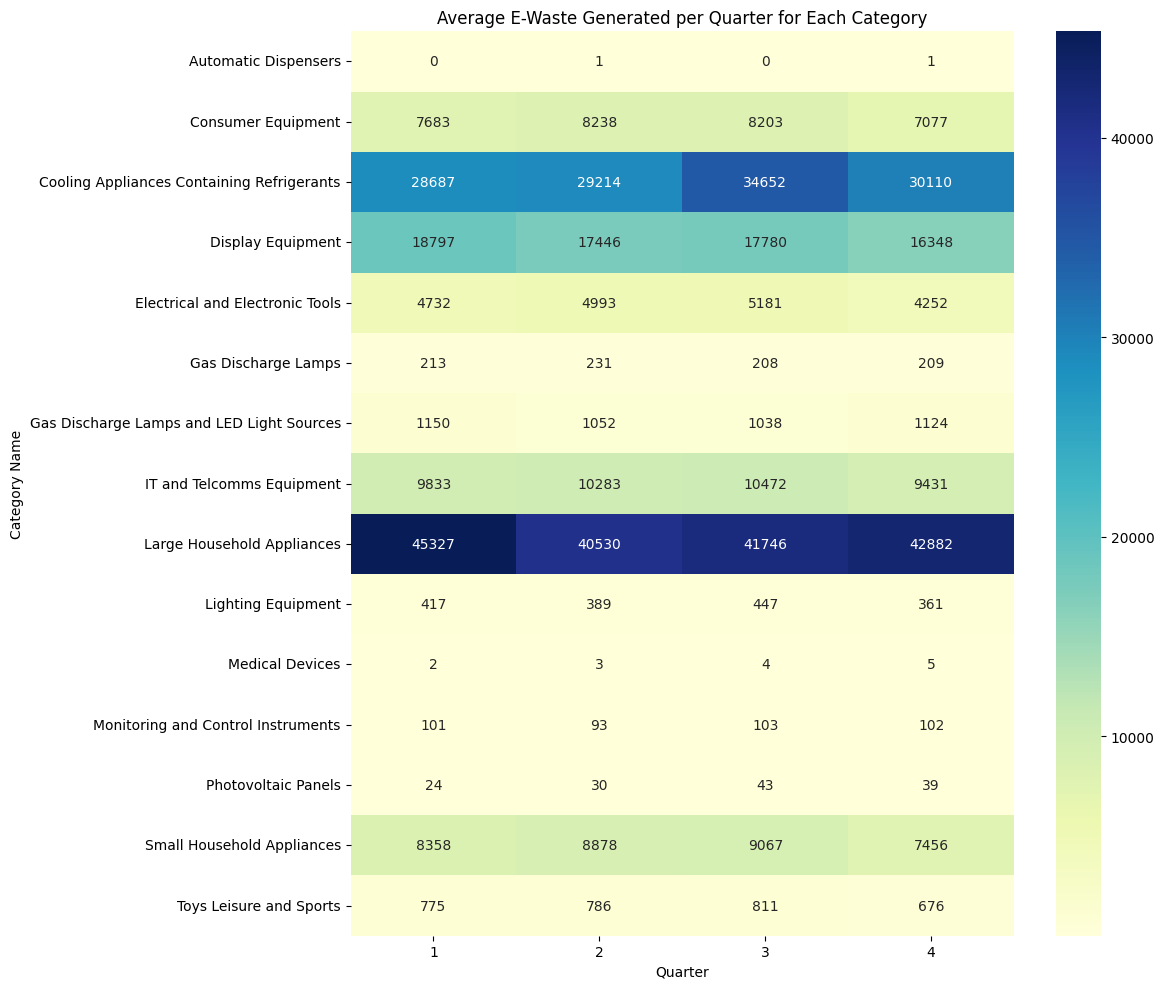

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

quarterly_e_waste = df.groupby(['Category Name', 'Quarter'])['Total E-Waste (tonnes)'].mean().reset_index()

quarterly_e_waste_pivot = pd.pivot_table(quarterly_e_waste, values='Total E-Waste (tonnes)', index='Category Name', columns='Quarter', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(quarterly_e_waste_pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average E-Waste Generated per Quarter for Each Category')
plt.xlabel('Quarter')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()


### Data visualization

#### Analysis questions
1. Find trend in the e-waste being generated, is it increasing? 
2. Which category is significantly contributing towards e-waste? 
3. Which category is the lowest in terms of e-waste contribution?
4. Which year had the highest amount of e-waste generated?
5. Which year had the lowest amount of e-waste generated?
6. Is there a relationship between the quarters of years and e-waste generated?
7. How does the projection look like for the next 10 years?



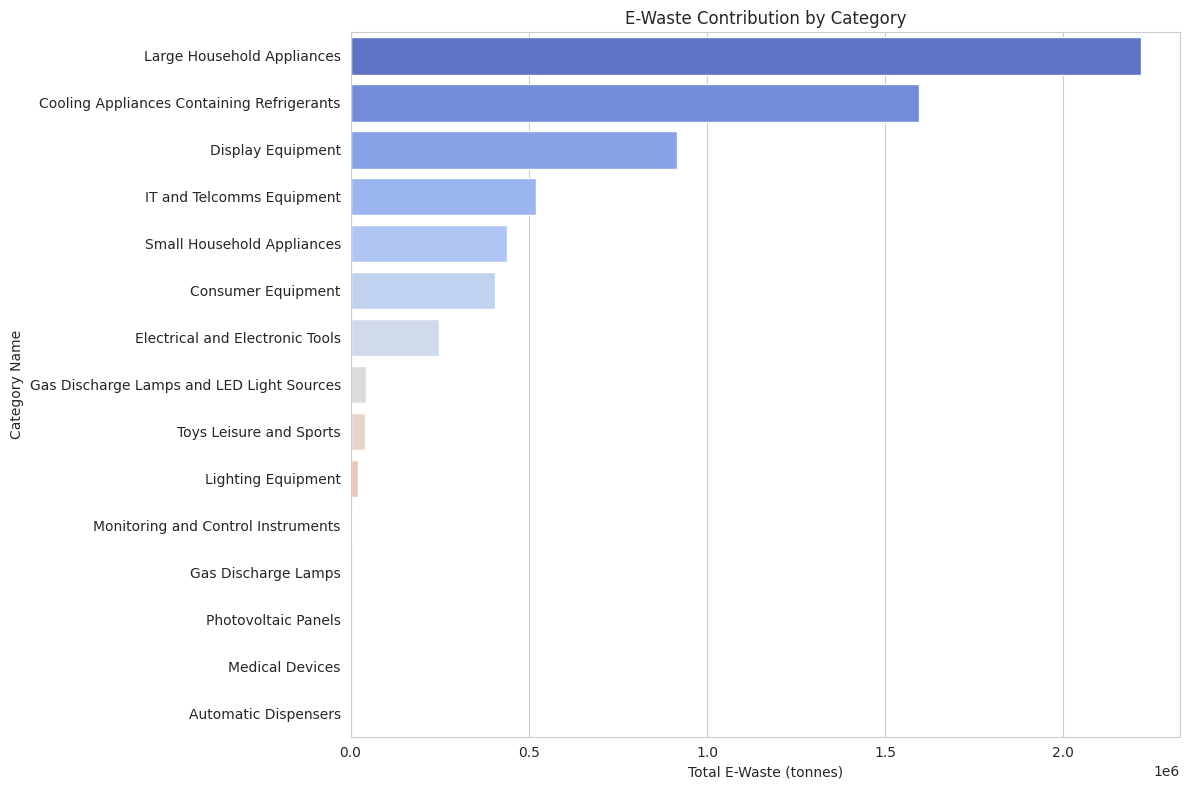

In [53]:
category_e_waste = df.groupby('Category Name')['Total E-Waste (tonnes)'].sum().reset_index().sort_values(by='Total E-Waste (tonnes)', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=category_e_waste, y='Category Name', x='Total E-Waste (tonnes)', palette='coolwarm')
plt.title('E-Waste Contribution by Category')
plt.xlabel('Total E-Waste (tonnes)')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()


The bar chart above illustrates the e-waste contribution by category, addressing Q2 and Q3. From this visualization, we can identify which category significantly contributes the most to e-waste and which contributes the least.

For Q2: The category at the top of the chart is the one contributing the most towards e-waste.
For Q3: Conversely, the category at the bottom contributes the least.


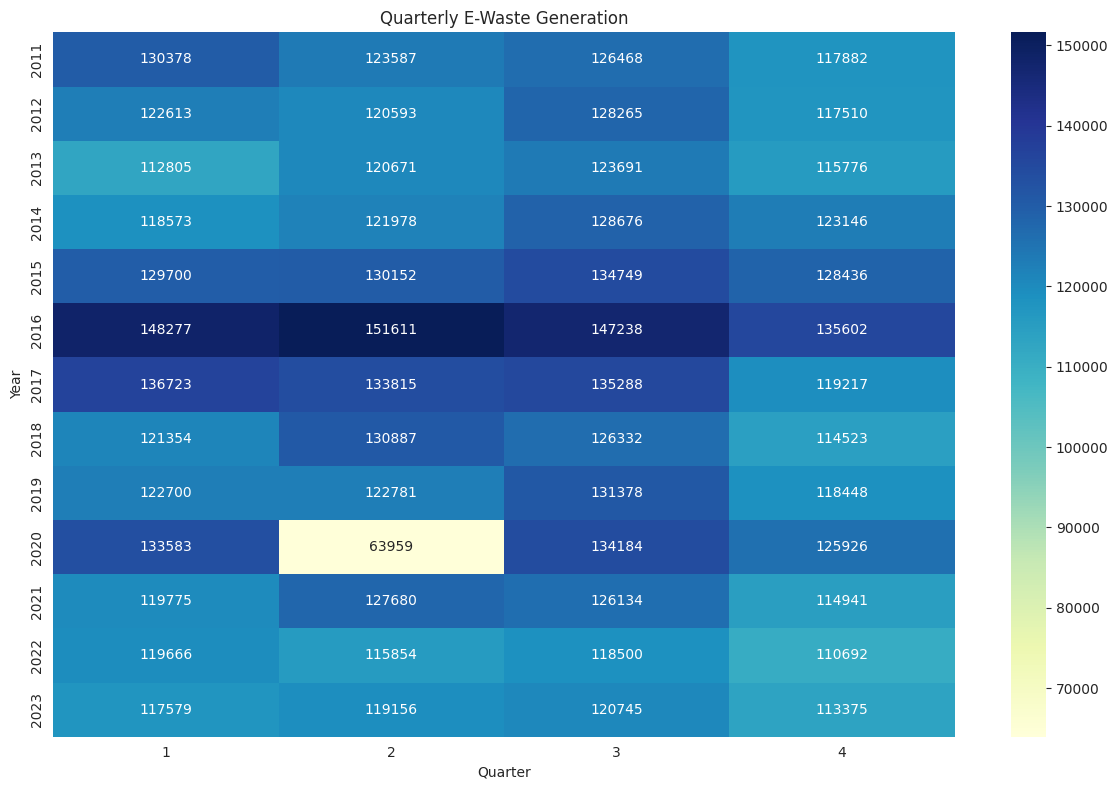

(Year                        2016.000
 Total E-Waste (tonnes)    582728.082
 Name: 5, dtype: float64,
 Year                        2020.000
 Total E-Waste (tonnes)    457651.205
 Name: 9, dtype: float64)

In [29]:
# Quarterly analysis
quarterly_e_waste = df.groupby(['Year', 'Quarter'])['Total E-Waste (tonnes)'].sum().reset_index()

pivot_quarterly_e_waste = quarterly_e_waste.pivot(index='Year', columns='Quarter', values='Total E-Waste (tonnes)')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_quarterly_e_waste, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Quarterly E-Waste Generation')
plt.xlabel('Quarter')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

year_highest_e_waste = yearly_e_waste.loc[yearly_e_waste['Total E-Waste (tonnes)'].idxmax()]
year_lowest_e_waste = yearly_e_waste.loc[yearly_e_waste['Total E-Waste (tonnes)'].idxmin()]
(year_highest_e_waste, year_lowest_e_waste)


Analysis Results for Q4, Q5, and Q6:

1. Q4 (Highest e-waste generation): The year with the highest amount of e-waste generated was 2016, with a total of approximately 582,728 tonnes.
2. Q5 (Lowest e-waste generation): Conversely, the year with the lowest amount of e-waste generated was 2020, with a total of approximately 457,651 tonnes.

The heatmap above provides a visual representation of the e-waste generation by quarter for each year, helping to address Q6. This visualization allows us to observe any seasonal patterns or trends in e-waste generation across different quarters. There appears to be variation in e-waste generation across different years and quarters, but without a clear, consistent seasonal pattern.



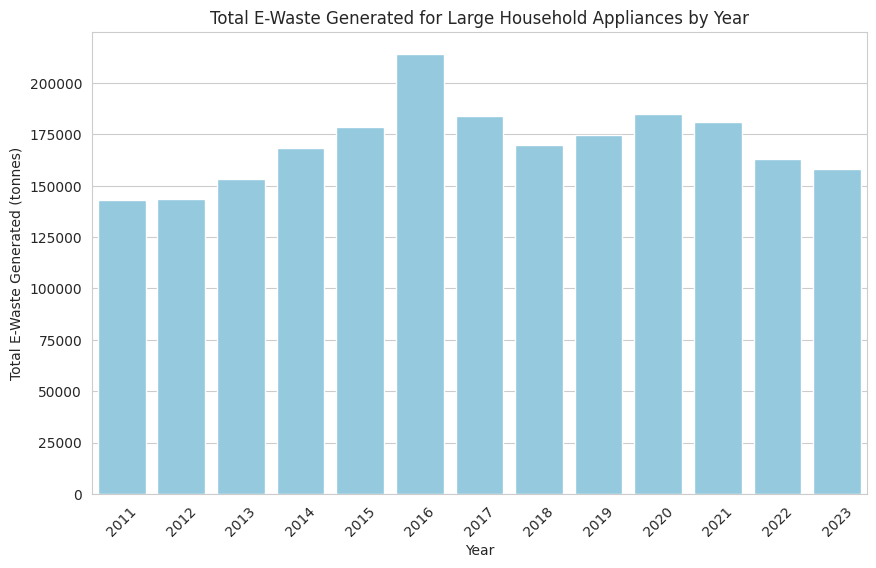

In [30]:
large_appliances_data = df[df['Category Name'] == 'Large Household Appliances']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Large Household Appliances by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  
plt.show()


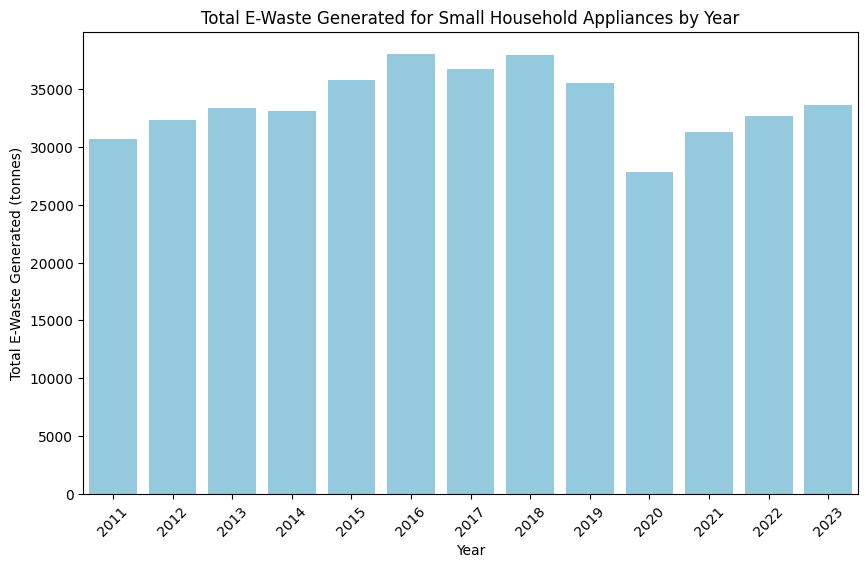

In [32]:
large_appliances_data = df[df['Category Name'] == 'Small Household Appliances']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Small Household Appliances by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


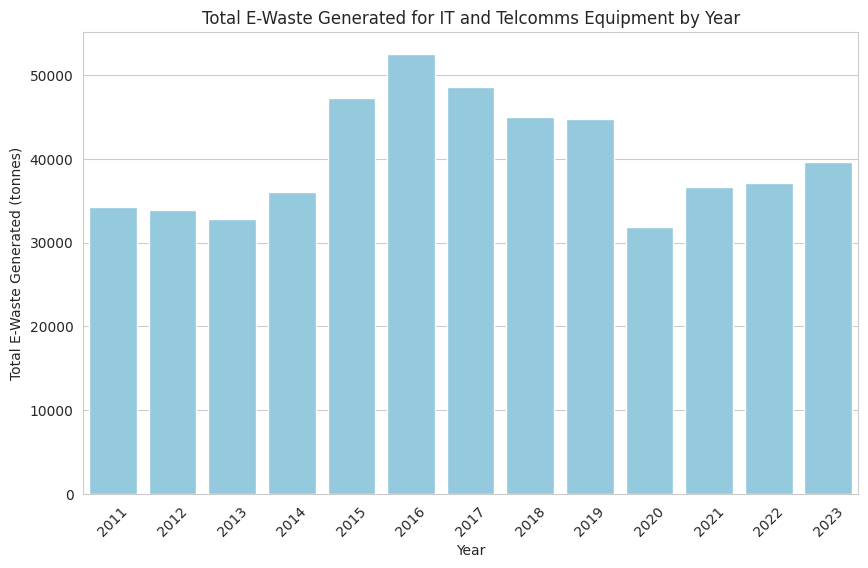

In [31]:
large_appliances_data = df[df['Category Name'] == 'IT and Telcomms Equipment']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for IT and Telcomms Equipment by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


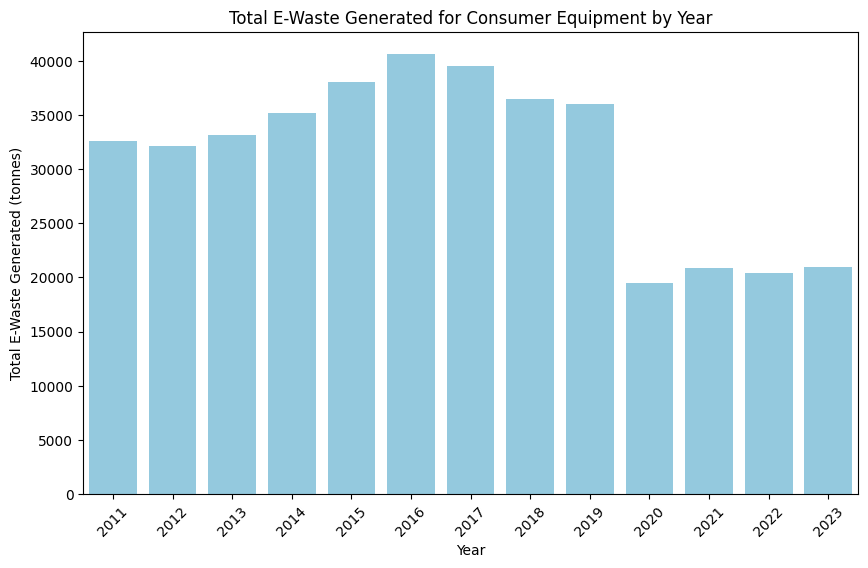

In [34]:
large_appliances_data = df[df['Category Name'] == 'Consumer Equipment']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Consumer Equipment by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


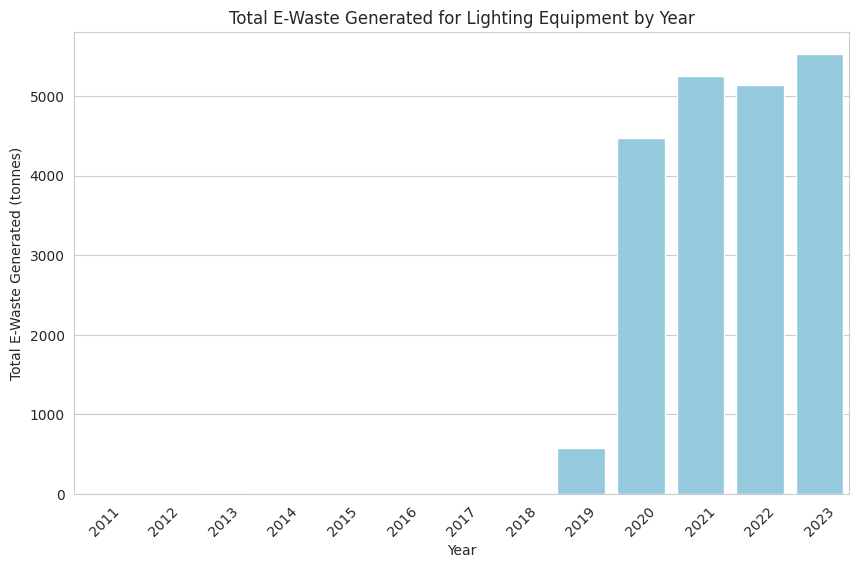

In [32]:
large_appliances_data = df[df['Category Name'] == 'Lighting Equipment']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Lighting Equipment by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


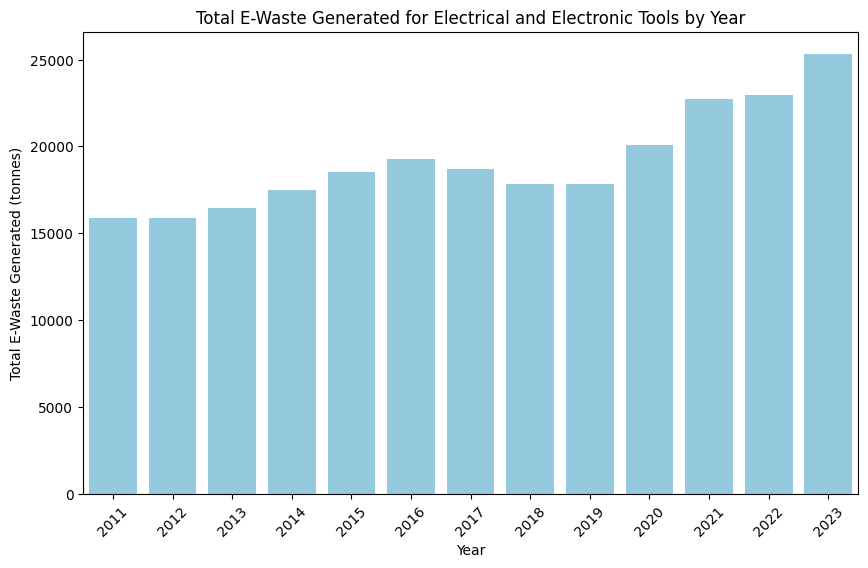

In [36]:
large_appliances_data = df[df['Category Name'] == 'Electrical and Electronic Tools']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Electrical and Electronic Tools by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


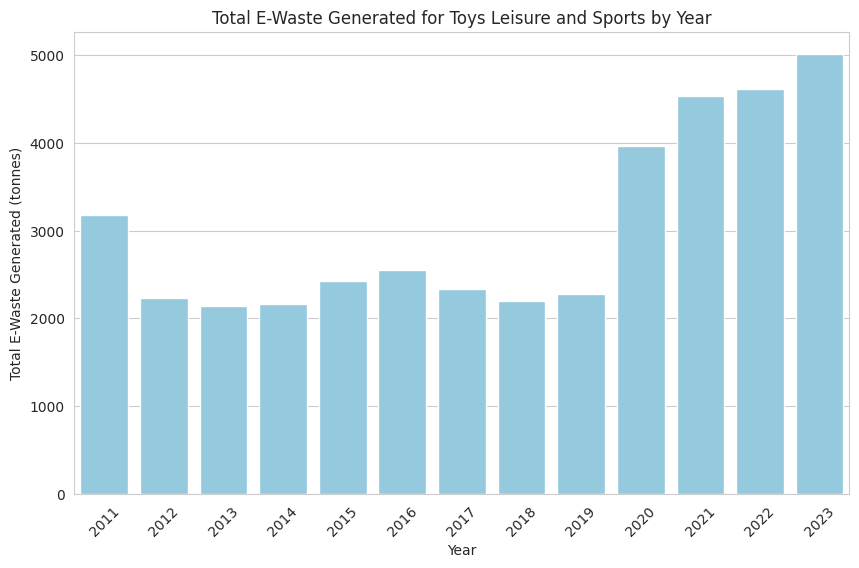

In [33]:
large_appliances_data = df[df['Category Name'] == 'Toys Leisure and Sports']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Toys Leisure and Sports by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


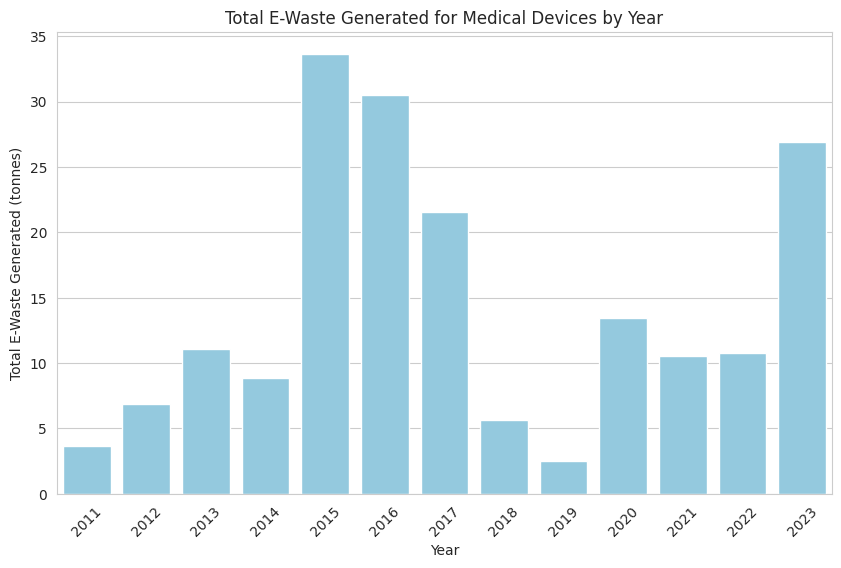

In [34]:
large_appliances_data = df[df['Category Name'] == 'Medical Devices']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Medical Devices by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


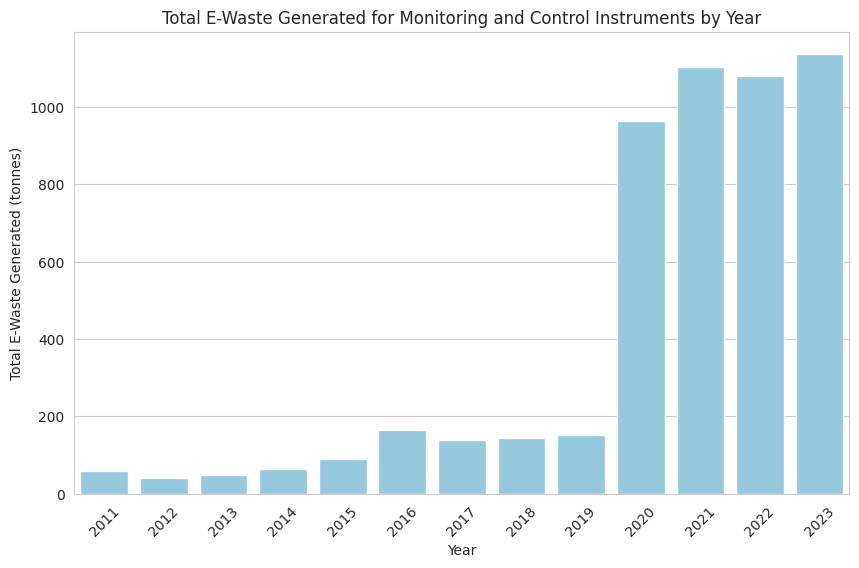

In [35]:
large_appliances_data = df[df['Category Name'] == 'Monitoring and Control Instruments']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Monitoring and Control Instruments by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


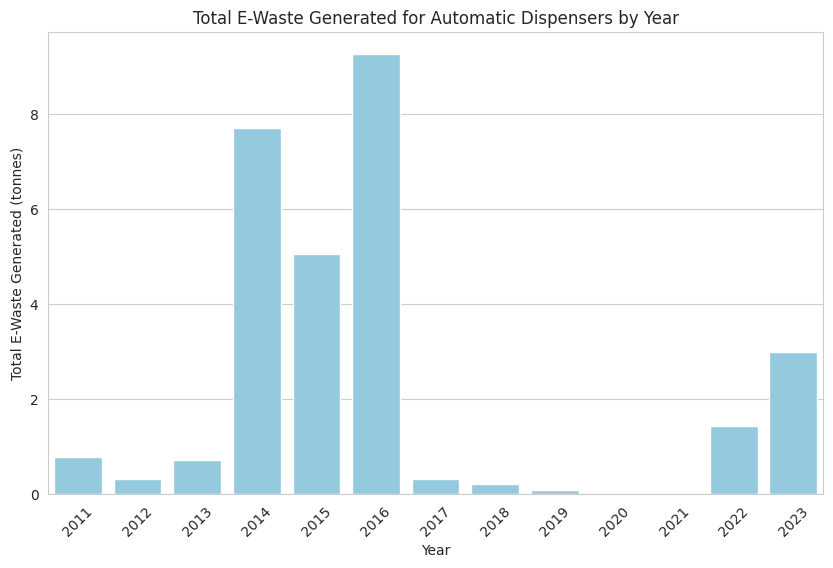

In [36]:
large_appliances_data = df[df['Category Name'] == 'Automatic Dispensers']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Automatic Dispensers by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


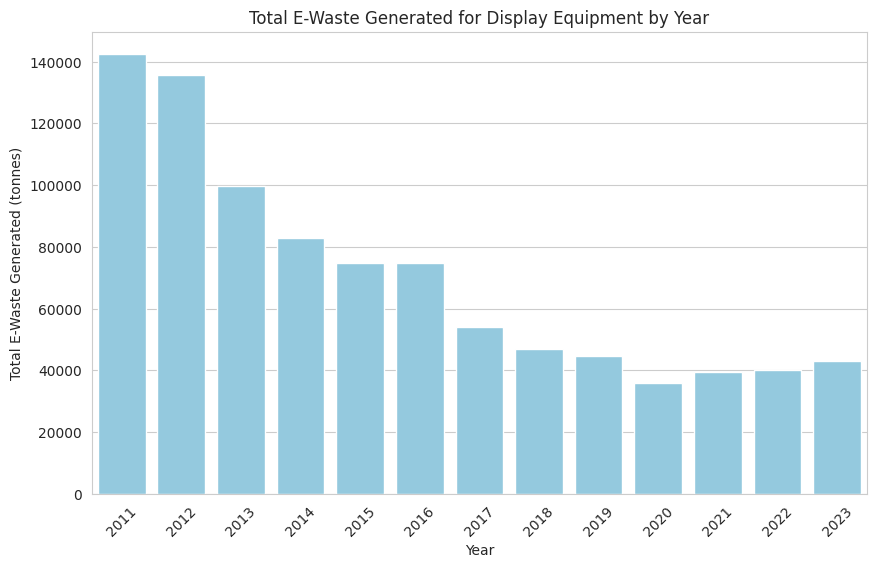

In [37]:
large_appliances_data = df[df['Category Name'] == 'Display Equipment']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Display Equipment by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


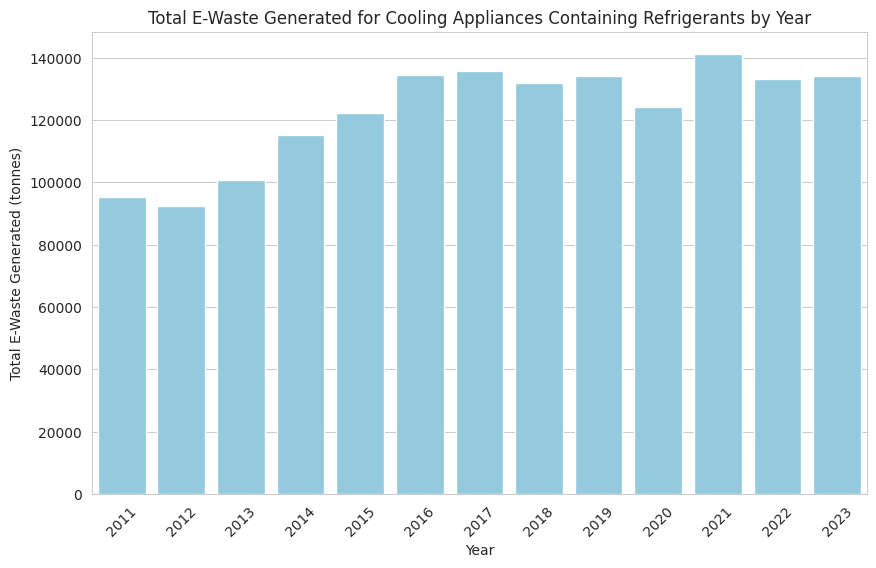

In [38]:
large_appliances_data = df[df['Category Name'] == 'Cooling Appliances Containing Refrigerants']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Cooling Appliances Containing Refrigerants by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


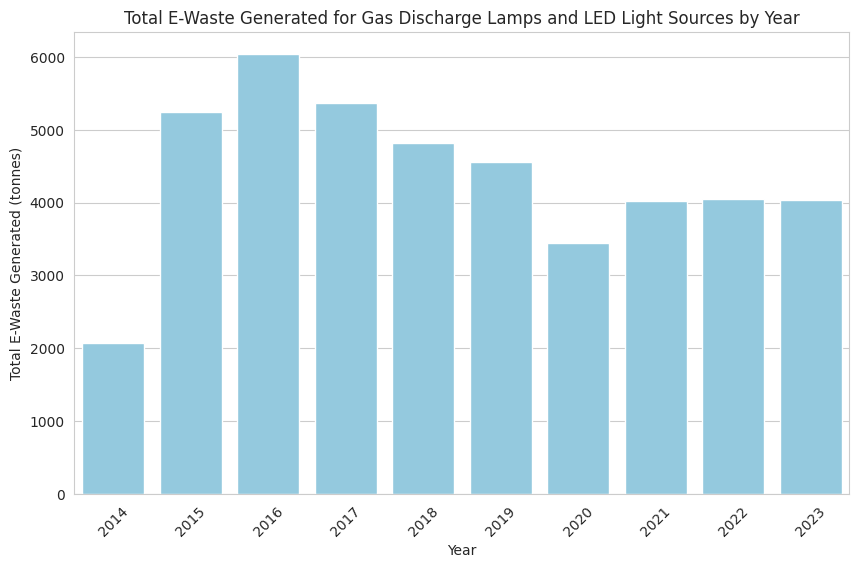

In [39]:
large_appliances_data = df[df['Category Name'] == 'Gas Discharge Lamps and LED Light Sources']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Gas Discharge Lamps and LED Light Sources by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


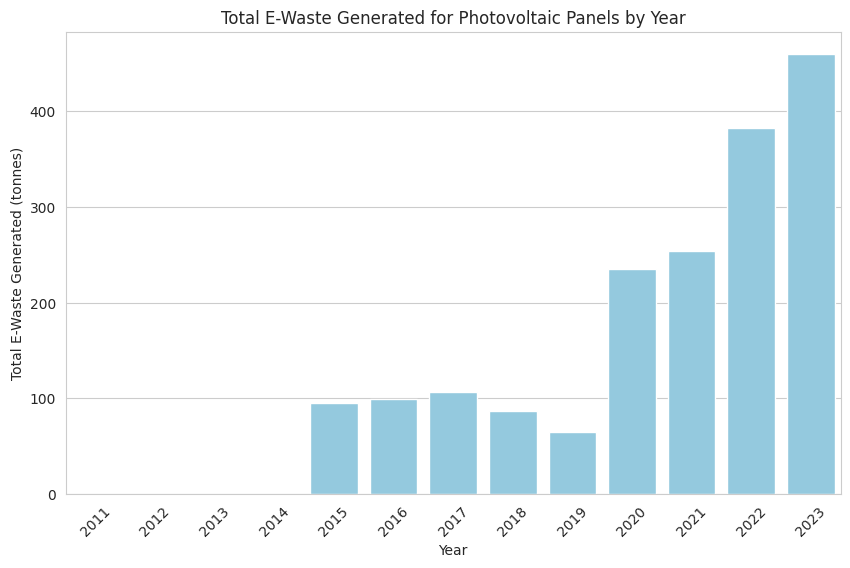

In [40]:
large_appliances_data = df[df['Category Name'] == 'Photovoltaic Panels']

yearly_totals_large_appliances = large_appliances_data.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_totals_large_appliances, x='Year', y='Total E-Waste (tonnes)', color='skyblue')
plt.title('Total E-Waste Generated for Photovoltaic Panels by Year')
plt.xlabel('Year')
plt.ylabel('Total E-Waste Generated (tonnes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


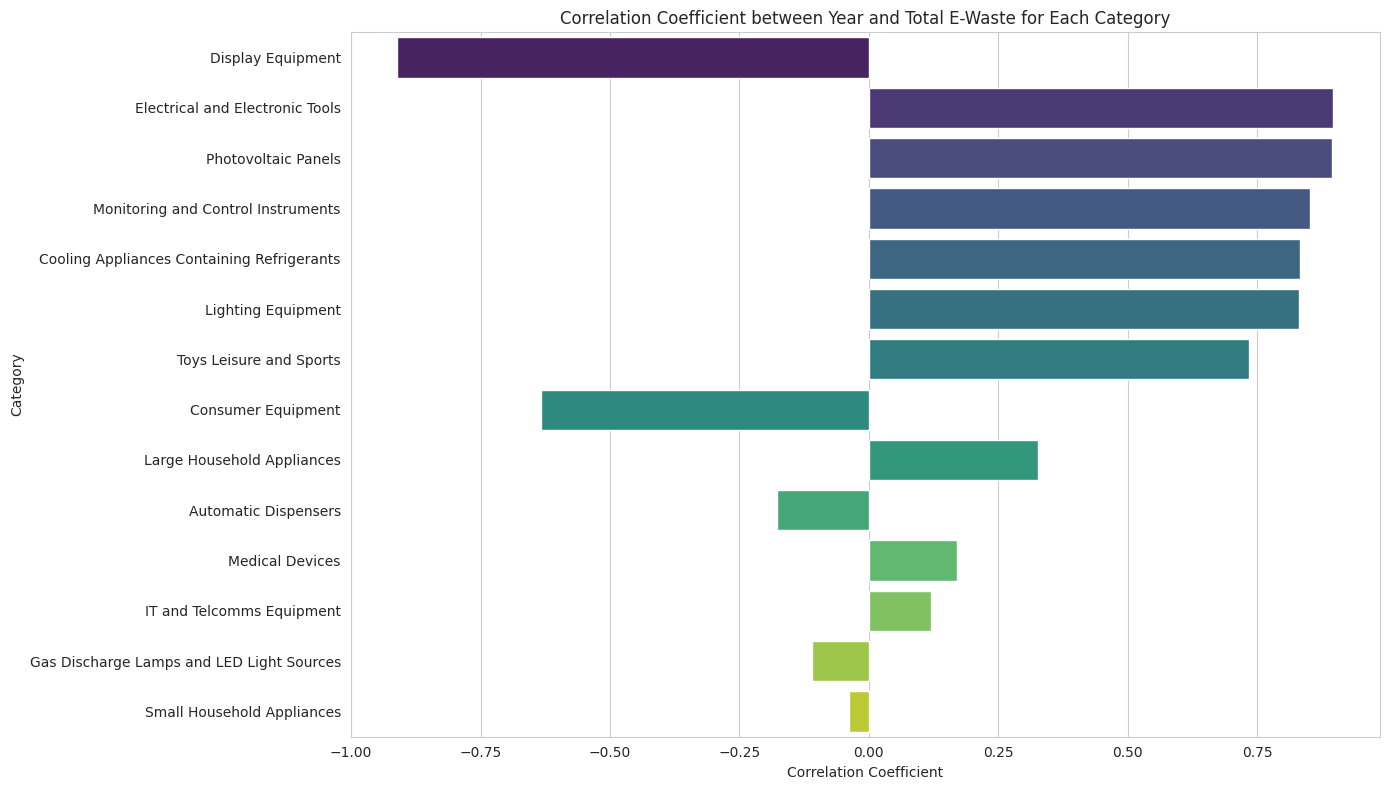

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categories = [
    'Large Household Appliances', 'Small Household Appliances', 'IT and Telcomms Equipment',
    'Consumer Equipment', 'Lighting Equipment', 'Electrical and Electronic Tools', 'Toys Leisure and Sports',
    'Medical Devices', 'Monitoring and Control Instruments', 'Automatic Dispensers', 'Display Equipment',
    'Cooling Appliances Containing Refrigerants', 'Gas Discharge Lamps and LED Light Sources', 'Photovoltaic Panels'
]

correlation_coefficients = [
    0.3268541036840822, -0.038596845732656544, 0.11958430566995468, -0.6330991580800127, 0.8304416119061148,
    0.8967862998234497, 0.7349536122970282, 0.17090554419624196, 0.8516981772381528, -0.17832868213362735,
    -0.9108773300494032, 0.8330839570412533, -0.10977452956029346, 0.8937954772442775
]

correlation_df = pd.DataFrame({
    'Category': categories,
    'Correlation Coefficient': correlation_coefficients
})

correlation_df_sorted = correlation_df.assign(Abs_Corr=correlation_df['Correlation Coefficient'].abs()).sort_values('Abs_Corr', ascending=False).drop('Abs_Corr', axis=1)
plt.figure(figsize=(14, 8))
sns.barplot(x='Correlation Coefficient', y='Category', data=correlation_df_sorted, palette='viridis')
plt.title('Correlation Coefficient between Year and Total E-Waste for Each Category')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


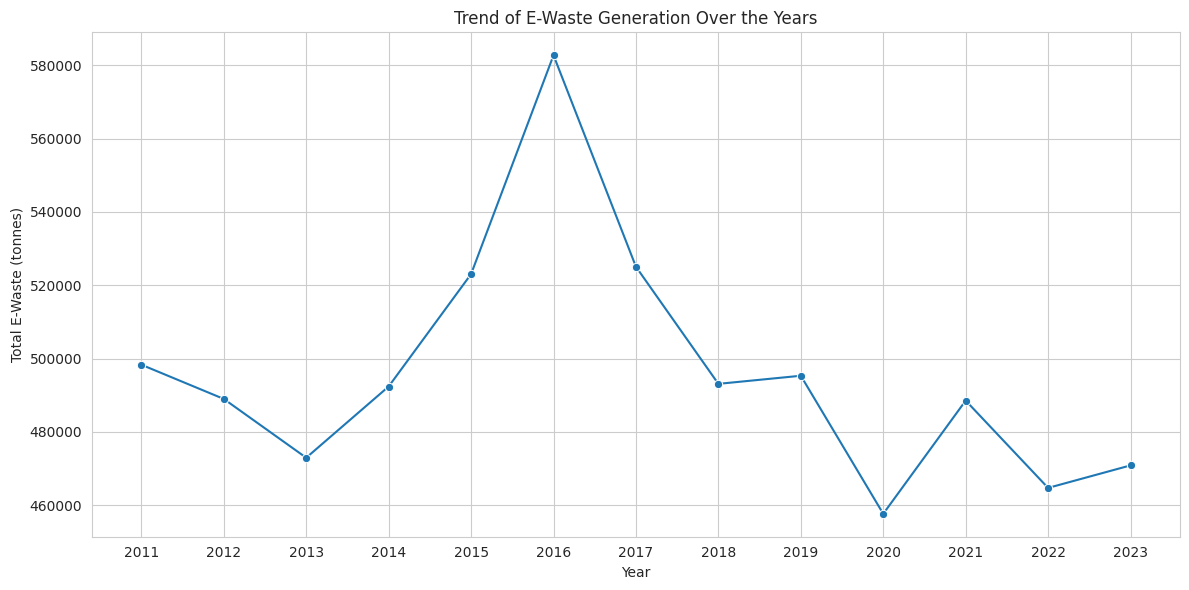

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Summing up all e-waste for each year
df['Total E-Waste (tonnes)'] = df[['Household WEEE collected from a DCF (tonnes)', 'Household WEEE returned under regulation 43 (tonnes)', 'Household WEEE returned under regulation 50 (tonnes)']].sum(axis=1)
yearly_e_waste = df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_e_waste, x='Year', y='Total E-Waste (tonnes)', marker='o')
plt.title('Trend of E-Waste Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Total E-Waste (tonnes)')
plt.xticks(yearly_e_waste['Year'])
plt.tight_layout()
plt.show()


The line chart above displays the trend of e-waste generation over the years, from 2011 to 2023. This visualization helps us answer Q1: there appears to be a fluctuating trend in e-waste generation over the years, with some years experiencing higher totals than others.



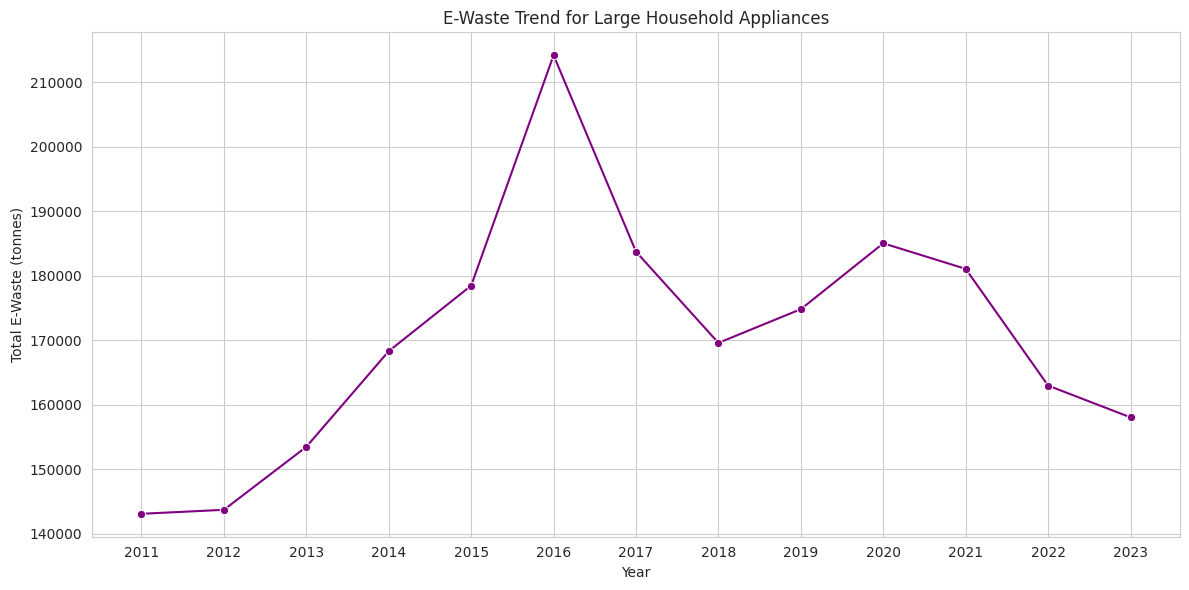

In [43]:
category_yearly_totals = df.groupby(['Category Name', 'Year'])['Total E-Waste (tonnes)'].sum().reset_index()

large_household_appliances_data = category_yearly_totals[category_yearly_totals['Category Name'] == "Large Household Appliances"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=large_household_appliances_data, x='Year', y='Total E-Waste (tonnes)', marker='o', color='purple')
plt.title('E-Waste Trend for Large Household Appliances')
plt.xlabel('Year')
plt.ylabel('Total E-Waste (tonnes)')
plt.xticks(large_household_appliances_data['Year'].unique())  # Ensure years are unique for tick labels
plt.tight_layout()
plt.show()


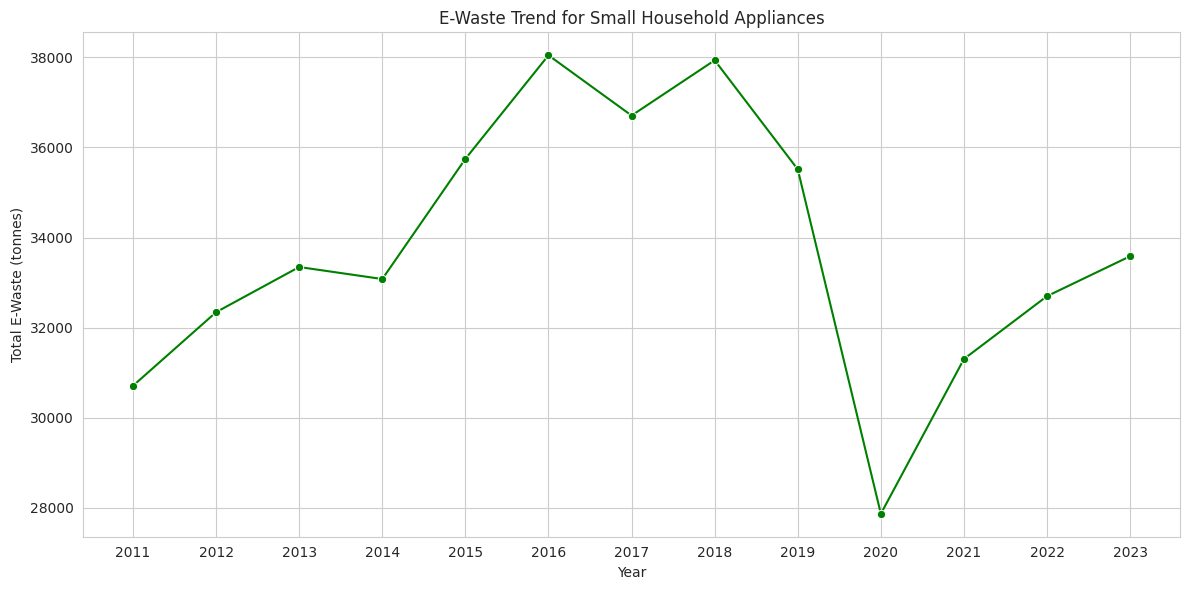

In [44]:
small_household_appliances_data = category_yearly_totals[category_yearly_totals['Category Name'] == "Small Household Appliances"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=small_household_appliances_data, x='Year', y='Total E-Waste (tonnes)', marker='o', color='green')
plt.title('E-Waste Trend for Small Household Appliances')
plt.xlabel('Year')
plt.ylabel('Total E-Waste (tonnes)')
plt.xticks(small_household_appliances_data['Year'])
plt.tight_layout()
plt.show()


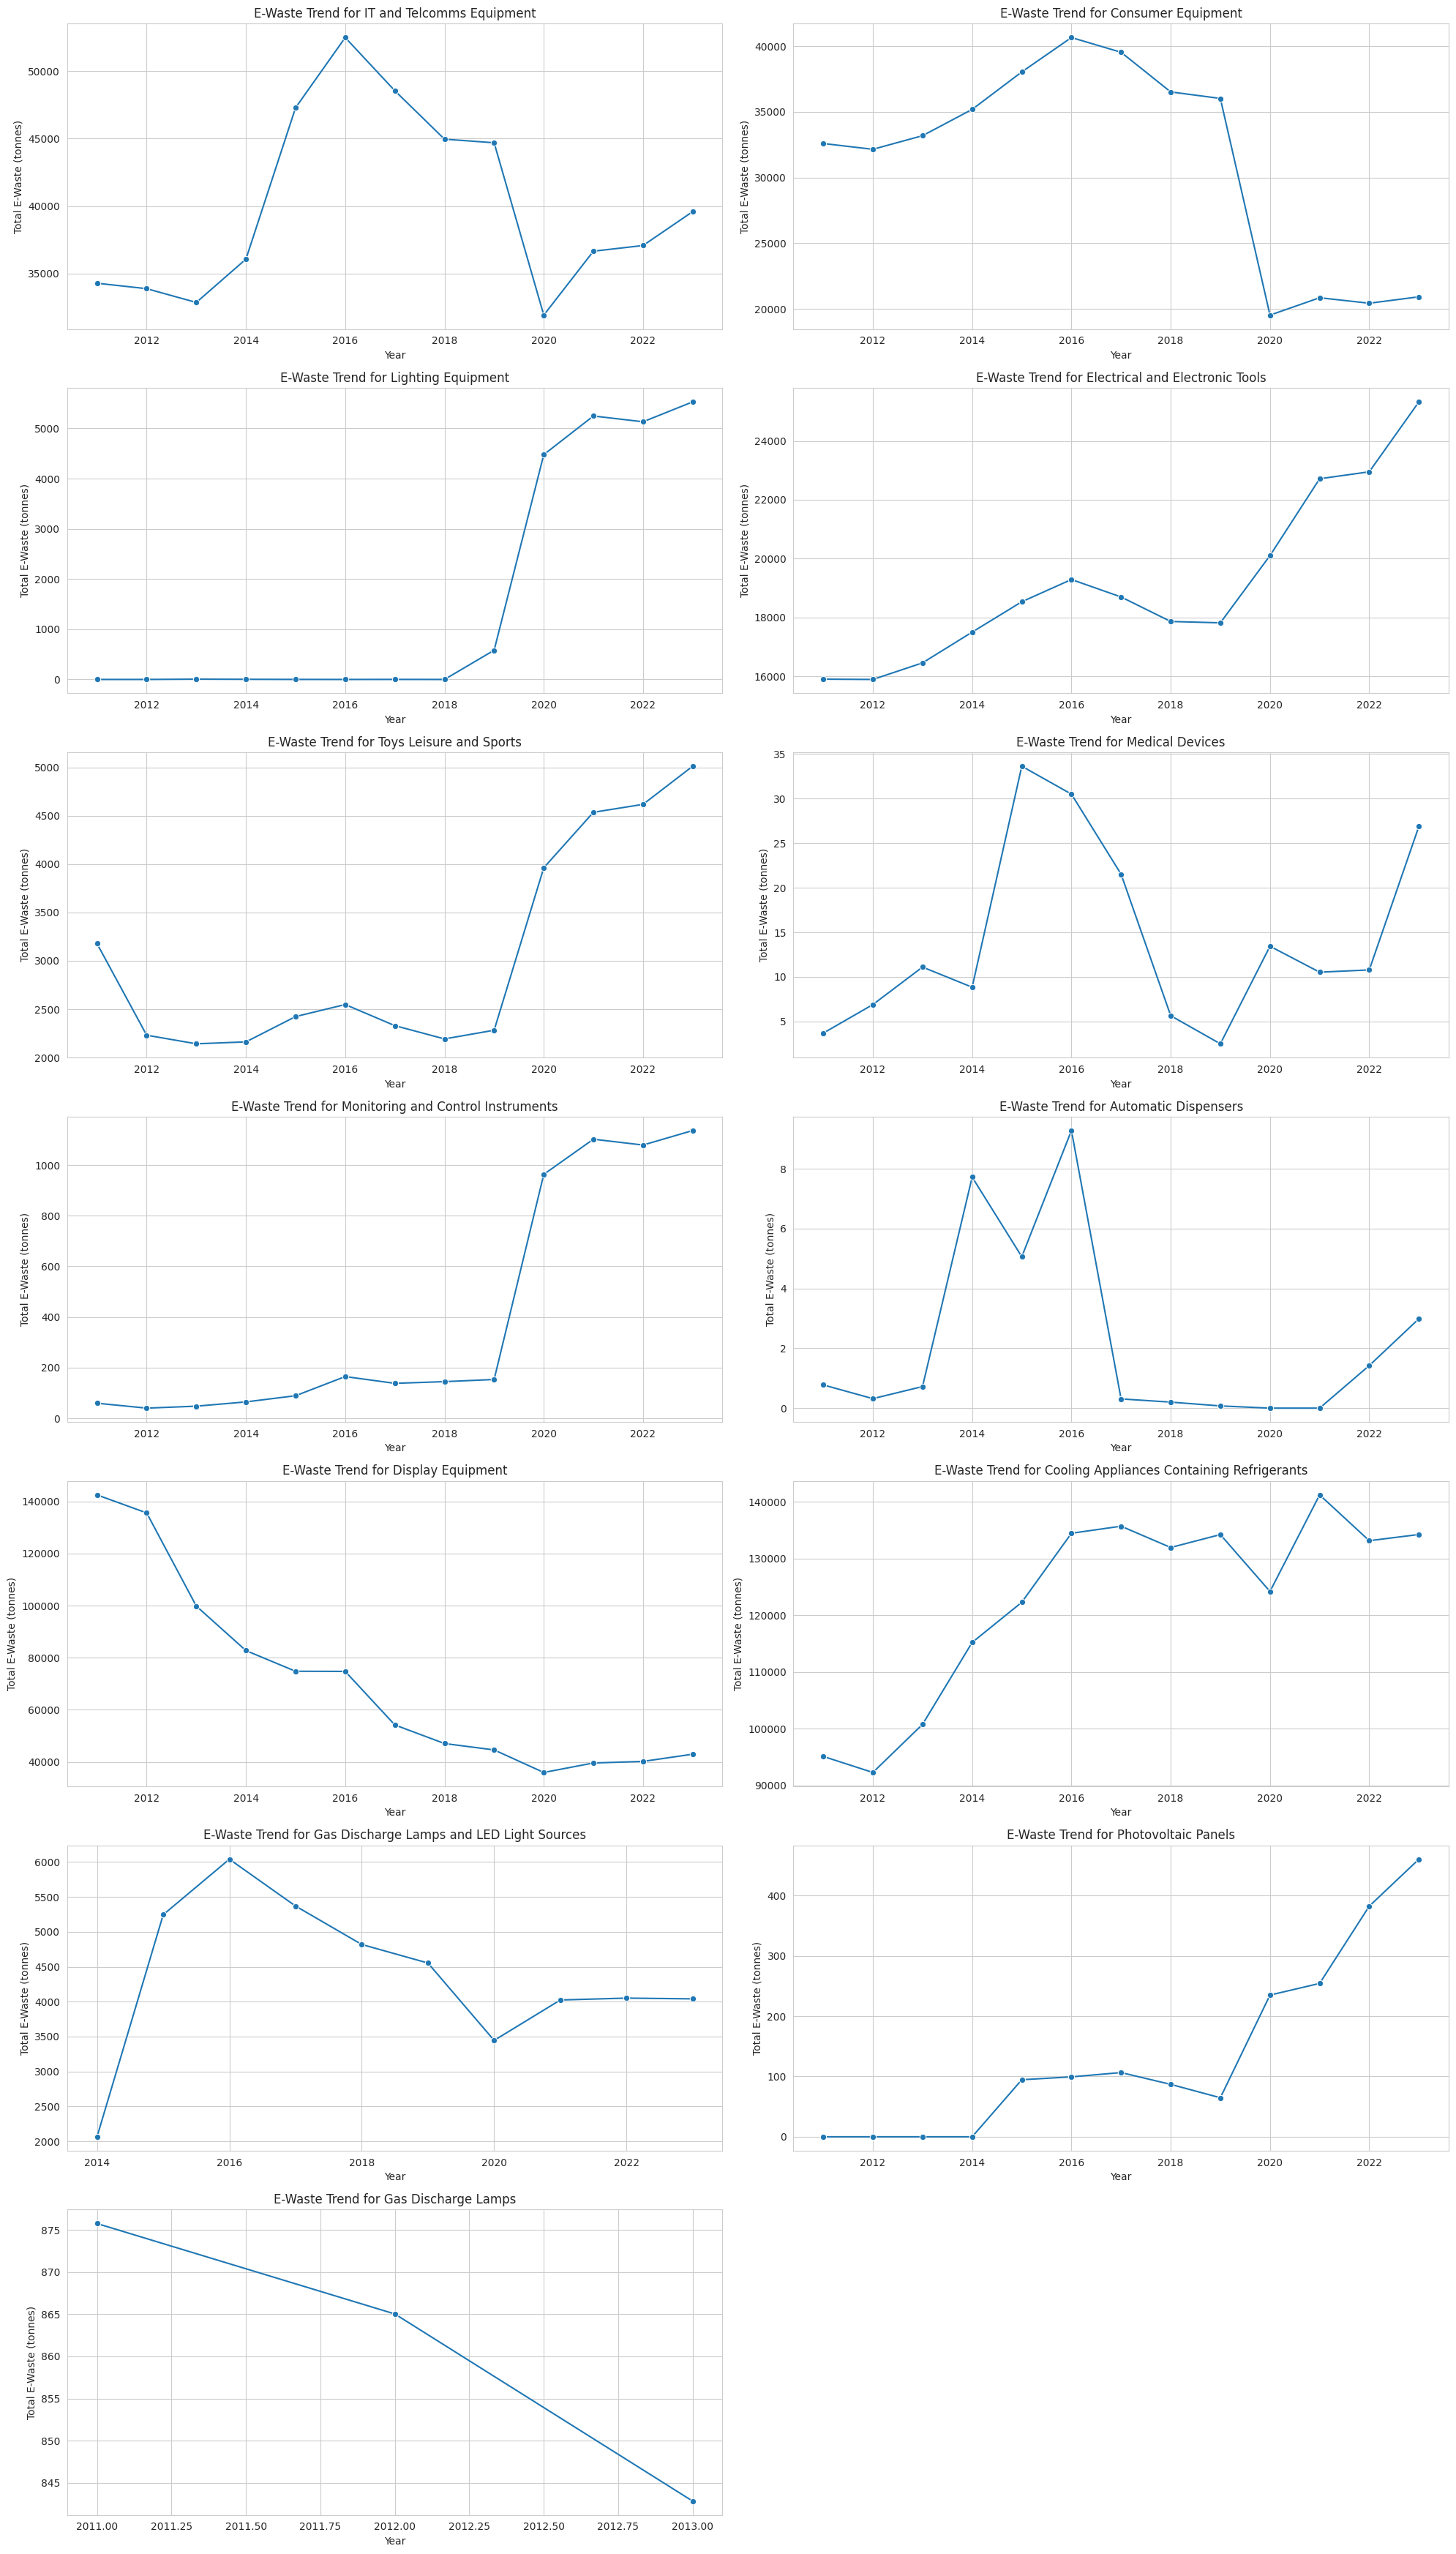

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
n_rows = len(remaining_categories) // 2 + (len(remaining_categories) % 2 > 0)

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 5 * n_rows))

axes_flat = axes.flatten()

for i, category in enumerate(remaining_categories):
    category_data = category_yearly_totals[category_yearly_totals['Category Name'] == category]
    sns.lineplot(ax=axes_flat[i], data=category_data, x='Year', y='Total E-Waste (tonnes)', marker='o')
    axes_flat[i].set_title(f'E-Waste Trend for {category}')
    axes_flat[i].set_xlabel('Year')
    axes_flat[i].set_ylabel('Total E-Waste (tonnes)')

if len(remaining_categories) % 2 != 0:
    axes_flat[-1].set_visible(False)

plt.tight_layout()
plt.show()


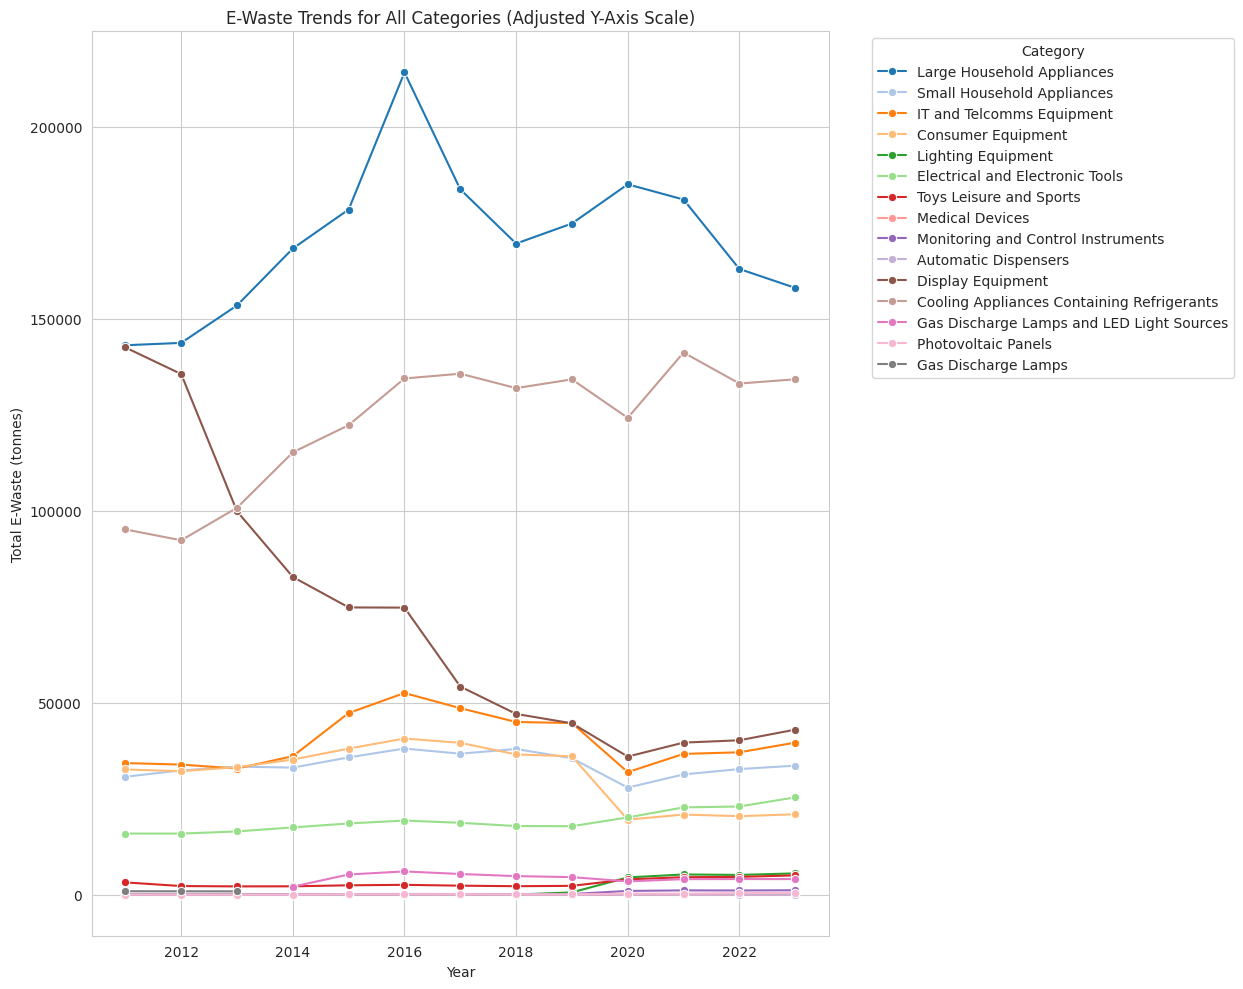

In [50]:
plt.figure(figsize=(15, 10))

colors = sns.color_palette("tab20", n_colors=len(df['Category Name'].unique()))

for i, category in enumerate(df['Category Name'].unique()):
    category_data = category_yearly_totals[category_yearly_totals['Category Name'] == category]
    sns.lineplot(data=category_data, x='Year', y='Total E-Waste (tonnes)', marker='o', label=category, color=colors[i])

plt.title('E-Waste Trends for All Categories (Adjusted Y-Axis Scale)')
plt.xlabel('Year')
plt.ylabel('Total E-Waste (tonnes)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()


### Performing ANOVA test to determine if there are statistically significant differences in e-waste generation across quarters.

In [51]:
from scipy.stats import f_oneway

categories = df['Category Name'].unique()

anova_results = []

for category in categories:
    category_data = df[df['Category Name'] == category]
    
    q1_data = category_data[category_data['Quarter'] == 1]['Total E-Waste (tonnes)']
    q2_data = category_data[category_data['Quarter'] == 2]['Total E-Waste (tonnes)']
    q3_data = category_data[category_data['Quarter'] == 3]['Total E-Waste (tonnes)']
    q4_data = category_data[category_data['Quarter'] == 4]['Total E-Waste (tonnes)']
    
    f_value, p_value = f_oneway(q1_data, q2_data, q3_data, q4_data)
    
    anova_results.append({
        'Category': category,
        'F-Value': f_value,
        'P-Value': p_value
    })

anova_results_df = pd.DataFrame(anova_results)

anova_results_df


,Category,F-Value,P-Value
0,Large Household Appliances,1.578297,0.206833
1,Small Household Appliances,6.370193,0.001009
2,IT and Telcomms Equipment,0.782151,0.509755
3,Consumer Equipment,0.914576,0.440975
4,Lighting Equipment,0.046649,0.986473
5,Electrical and Electronic Tools,2.714002,0.055107
6,Toys Leisure and Sports,0.547394,0.652304
7,Medical Devices,1.981805,0.129244
8,Monitoring and Control Instruments,0.016890,0.996969
9,Automatic Dispensers,1.054425,0.377228


# Level 3 Advanced Data Analytics with Machine Learning

In [65]:
yearly_e_waste_totals = df.groupby('Year')['Total E-Waste (tonnes)'].sum().reset_index()


## Linear Regression Model

In [66]:
from sklearn.linear_model import LinearRegression

total_annual_ewaste = data.groupby('Year')['Total Collected'].sum().reset_index()

X_total = total_annual_ewaste[['Year']]
y_total = total_annual_ewaste['Total Collected']

model_total = LinearRegression()
model_total.fit(X_total, y_total)

forecast_years_total = np.arange(2024, 2036).reshape(-1, 1)  # Including 2035
forecasted_totals = model_total.predict(forecast_years_total)

forecasted_total_df = pd.DataFrame({'Year': forecast_years_total.flatten(), 'Forecasted Total E-Waste (tonnes)': forecasted_totals})

forecasted_total_df


,Year,Forecasted Total E-Waste (tonnes)
0,2024,478235.188577
1,2025,475636.150802
2,2026,473037.113027
3,2027,470438.075253
4,2028,467839.037478
5,2029,465239.999703
6,2030,462640.961929
7,2031,460041.924154
8,2032,457442.886379
9,2033,454843.848604


## ARIMA Forecasting

ADF Statistic: -1.724411
p-value: 0.418581


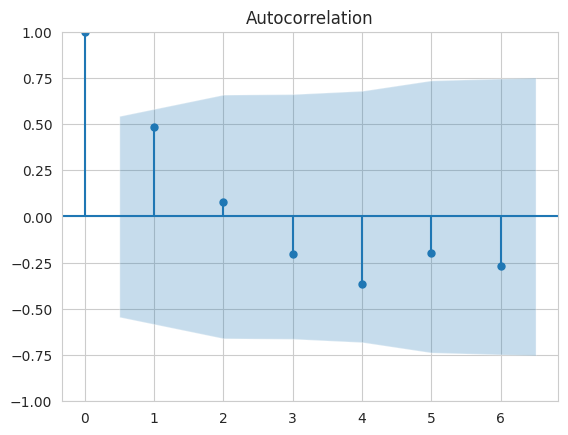

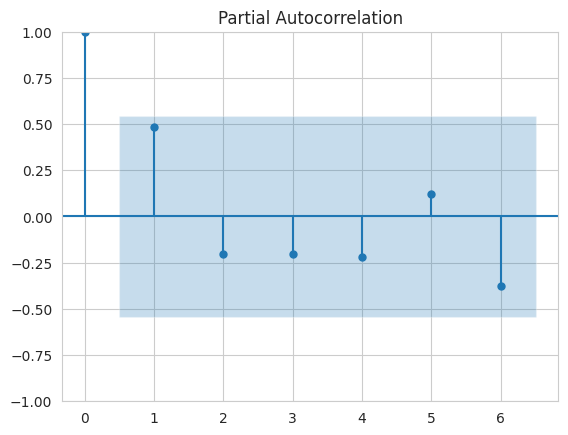

In [67]:
annual_totals = data.groupby('Year').agg({
    'Household WEEE collected from a DCF (tonnes)': 'sum',
    'Household WEEE returned under regulation 43 (tonnes)': 'sum',
    'Household WEEE returned under regulation 50 (tonnes)': 'sum'
}).sum(axis=1).reset_index(name='Total Collected')

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

result = adfuller(annual_totals['Total Collected'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

plot_acf(annual_totals['Total Collected'])
plt.show()

plot_pacf(annual_totals['Total Collected'])
plt.show()


In [68]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(annual_totals['Total Collected'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:        Total Collected   No. Observations:                   13
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -141.720
Date:                Mon, 01 Apr 2024   AIC                            289.441
Time:                        00:59:49   BIC                            290.895
Sample:                             0   HQIC                           288.902
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9821      1.377      0.713      0.476      -1.716       3.680
ma.L1         -0.9906      1.600     -0.619      0.536      -4.127       2.146
sigma2      1.295e+09   2.98e-09   4.35e+17      0.0

In [69]:
# Forecasting the next 10 years
forecast = model_fit.forecast(steps=10)

forecast


13    468210.338072
14    465613.529538
15    463063.208038
16    460558.541378
17    458098.712264
18    455682.918033
19    453310.370389
20    450980.295148
21    448691.931988
22    446444.534195
Name: predicted_mean, dtype: float64

## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

annual_totals = data.groupby('Year').agg({
    'Household WEEE collected from a DCF (tonnes)': 'sum',
    'Household WEEE returned under regulation 43 (tonnes)': 'sum',
    'Household WEEE returned under regulation 50 (tonnes)': 'sum'
}).sum(axis=1).reset_index(name='Total Collected')

annual_totals['Lag_1'] = annual_totals['Total Collected'].shift(1)
annual_totals.dropna(inplace=True)  

X = annual_totals[['Lag_1']]  
y = annual_totals['Total Collected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [75]:
future_input = np.array([annual_totals['Total Collected'].iloc[-1]]).reshape(1, -1)

future_predictions = []
for _ in range(10):
    future_pred = model.predict(future_input)
    future_predictions.append(future_pred[0])
    future_input = np.array([future_pred[0]]).reshape(1, -1)

forecast_years = np.arange(annual_totals['Year'].iloc[-1] + 1, annual_totals['Year'].iloc[-1] + 11)
forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted Total E-Waste': future_predictions})
forecast_df


,Year,Forecasted Total E-Waste
0,2024,487447.83085
1,2025,488746.50351
2,2026,488746.50351
3,2027,488746.50351
4,2028,488746.50351
5,2029,488746.50351
6,2030,488746.50351
7,2031,488746.50351
8,2032,488746.50351
9,2033,488746.50351


## Exponential Soothing

In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_exp_smoothing = ExponentialSmoothing(y_total, trend="additive", seasonal=None, initialization_method="estimated")
model_exp_smoothing_fit = model_exp_smoothing.fit()

forecast_exp_smoothing = model_exp_smoothing_fit.forecast(steps=12)  

forecast_years_exp = np.arange(2024, 2036)
forecasted_values_exp = pd.DataFrame({'Year': forecast_years_exp, 'Forecasted Total E-Waste (tonnes)': forecast_exp_smoothing.values})

forecasted_values_exp


/home/haris/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Year,Forecasted Total E-Waste (tonnes)
0,2024,469913.624825
1,2025,469527.421855
2,2026,469141.218885
3,2027,468755.015915
4,2028,468368.812946
5,2029,467982.609976
6,2030,467596.407006
7,2031,467210.204036
8,2032,466824.001067
9,2033,466437.798097


# Level 4 Deep Learning

## Long Short-Term Memory (LSTM)

### Preprocessing the dataset

In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = 'dav-ewaste-dataset.xlsx' 
data = pd.read_excel(file_path)

data['Total Collected'] = data[['Household WEEE collected from a DCF (tonnes)',
                                'Household WEEE returned under regulation 43 (tonnes)',
                                'Household WEEE returned under regulation 50 (tonnes)']].sum(axis=1)
total_annual_ewaste = data.groupby('Year')['Total Collected'].sum().reset_index()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(total_annual_ewaste['Total Collected'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1 
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

X, Y = create_dataset(scaled_data, look_back=1)
print(f"Length of X: {len(X)}")
print(f"Length of Y: {len(Y)}")


Length of X: 12
Length of Y: 12


### Implementing the algorithm

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error


model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

last_known_input = scaled_data[-look_back:].reshape((1, 1, look_back))

forecast = []

for _ in range(12): 
    next_step = model.predict(last_known_input)
    forecast.append(next_step.flatten()[0])
    last_known_input = np.roll(last_known_input, -1)
    last_known_input[0, 0, -1] = next_step

forecast = np.array(forecast).reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)

future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 1 + 12)

forecasted_values = pd.DataFrame({
    'Year': future_years,
    'Forecasted Total E-Waste (tonnes)': forecast.flatten()
})

forecasted_values


2024-04-01 00:59:25.397545: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 00:59:26.056217: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 00:59:26.061096: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 00:59:27.752233: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100
12/12 - 2s - loss: 0.1601 - 2s/epoch - 133ms/step
Epoch 2/100
12/12 - 0s - loss: 0.1425 - 32ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1227 - 32ms/epoch - 3ms/step
Epoch 4/100
12/12 - 0s - loss: 0.1110 - 38ms/epoch - 3ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0978 - 33ms/epoch - 3ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0850 - 32ms/epoch - 3ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0766 - 37ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0721 - 36ms/epoch - 3ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0658 - 32ms/epoch - 3ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0624 - 36ms/epoch - 3ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0611 - 33ms/epoch - 3ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0592 - 34ms/epoch - 3ms/step
Epoch 13/100
12/12 - 0s - loss: 0.0582 - 34ms/epoch - 3ms/step
Epoch 14/100
12/12 - 0s - loss: 0.0574 - 31ms/epoch - 3ms/step
Epoch 15/100
12/12 - 0s - loss: 0.0577 - 33ms/epoch - 3ms/step
Epoch 16/100
12/12 - 0s - loss: 0.0573 - 41ms/epoch - 3ms/step
E

,Year,Forecasted Total E-Waste (tonnes)
0,2024,483868.53125
1,2025,489765.34375
2,2026,492484.96875
3,2027,493748.93750
4,2028,494338.46875
5,2029,494613.81250
6,2030,494742.56250
7,2031,494802.75000
8,2032,494830.93750
9,2033,494844.09375


## Recurrent Neural Network (RNN)

In [188]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

data_path = 'dav-ewaste-dataset.xlsx'
data = pd.read_excel(data_path)

data['Total Collected'] = data[['Household WEEE collected from a DCF (tonnes)',
                                'Household WEEE returned under regulation 43 (tonnes)',
                                'Household WEEE returned under regulation 50 (tonnes)']].sum(axis=1)
annual_data = data.groupby('Year')['Total Collected'].sum().reset_index()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(annual_data['Total Collected'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

model = Sequential()
model.add(SimpleRNN(units=100, input_shape=(1, look_back), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, Y, epochs=200, batch_size=1, verbose=2)

# Predict the next 10 years
num_years = 10
last_known_year_data = scaled_data[-look_back:].reshape((1, 1, look_back))
future_predictions_scaled = []

for _ in range(num_years):
    next_year_prediction = model.predict(last_known_year_data)
    future_predictions_scaled.append(next_year_prediction[0][0])
    last_known_year_data = np.array([[next_year_prediction[0]]])

future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

last_year = annual_data['Year'].iloc[-1]
future_years = np.arange(last_year + 1, last_year + 1 + num_years)

forecast_df = pd.DataFrame({
    'Year': future_years,
    'Predicted Total E-Waste (tonnes)': future_predictions.flatten()
})

forecast_df


Epoch 1/200
12/12 - 1s - loss: 0.1350 - 786ms/epoch - 65ms/step
Epoch 2/200
12/12 - 0s - loss: 0.0879 - 21ms/epoch - 2ms/step
Epoch 3/200
12/12 - 0s - loss: 0.0684 - 46ms/epoch - 4ms/step
Epoch 4/200
12/12 - 0s - loss: 0.0575 - 40ms/epoch - 3ms/step
Epoch 5/200
12/12 - 0s - loss: 0.0536 - 34ms/epoch - 3ms/step
Epoch 6/200
12/12 - 0s - loss: 0.0533 - 31ms/epoch - 3ms/step
Epoch 7/200
12/12 - 0s - loss: 0.0536 - 29ms/epoch - 2ms/step
Epoch 8/200
12/12 - 0s - loss: 0.0541 - 29ms/epoch - 2ms/step
Epoch 9/200
12/12 - 0s - loss: 0.0533 - 29ms/epoch - 2ms/step
Epoch 10/200
12/12 - 0s - loss: 0.0532 - 26ms/epoch - 2ms/step
Epoch 11/200
12/12 - 0s - loss: 0.0530 - 32ms/epoch - 3ms/step
Epoch 12/200
12/12 - 0s - loss: 0.0526 - 39ms/epoch - 3ms/step
Epoch 13/200
12/12 - 0s - loss: 0.0531 - 36ms/epoch - 3ms/step
Epoch 14/200
12/12 - 0s - loss: 0.0528 - 30ms/epoch - 3ms/step
Epoch 15/200
12/12 - 0s - loss: 0.0527 - 72ms/epoch - 6ms/step
Epoch 16/200
12/12 - 0s - loss: 0.0526 - 31ms/epoch - 3ms/step

,Year,Predicted Total E-Waste (tonnes)
0,2024,478646.81250
1,2025,483483.50000
2,2026,486485.59375
3,2027,488371.37500
4,2028,489560.53125
5,2029,490310.40625
6,2030,490783.28125
7,2031,491091.96875
8,2032,491307.43750
9,2033,491460.84375


## Multi Layer Perceptron

In [184]:
from keras.models import Sequential
from keras.layers import Dense

model_mlp = Sequential()
model_mlp.add(Dense(50, input_dim=look_back, activation='relu'))  
model_mlp.add(Dense(1))  
model_mlp.compile(optimizer='adam', loss='mean_squared_error')

model_mlp.fit(X, Y, epochs=200, batch_size=1, verbose=2)


Epoch 1/200
12/12 - 0s - loss: 0.1389 - 318ms/epoch - 27ms/step
Epoch 2/200
12/12 - 0s - loss: 0.1076 - 17ms/epoch - 1ms/step
Epoch 3/200
12/12 - 0s - loss: 0.0908 - 33ms/epoch - 3ms/step
Epoch 4/200
12/12 - 0s - loss: 0.0741 - 36ms/epoch - 3ms/step
Epoch 5/200
12/12 - 0s - loss: 0.0667 - 30ms/epoch - 3ms/step
Epoch 6/200
12/12 - 0s - loss: 0.0593 - 28ms/epoch - 2ms/step
Epoch 7/200
12/12 - 0s - loss: 0.0585 - 23ms/epoch - 2ms/step
Epoch 8/200
12/12 - 0s - loss: 0.0558 - 23ms/epoch - 2ms/step
Epoch 9/200
12/12 - 0s - loss: 0.0546 - 19ms/epoch - 2ms/step
Epoch 10/200
12/12 - 0s - loss: 0.0538 - 27ms/epoch - 2ms/step
Epoch 11/200
12/12 - 0s - loss: 0.0536 - 22ms/epoch - 2ms/step
Epoch 12/200
12/12 - 0s - loss: 0.0534 - 22ms/epoch - 2ms/step
Epoch 13/200
12/12 - 0s - loss: 0.0531 - 31ms/epoch - 3ms/step
Epoch 14/200
12/12 - 0s - loss: 0.0535 - 21ms/epoch - 2ms/step
Epoch 15/200
12/12 - 0s - loss: 0.0533 - 25ms/epoch - 2ms/step
Epoch 16/200
12/12 - 0s - loss: 0.0533 - 27ms/epoch - 2ms/step

In [185]:
predictions_mlp_scaled = model_mlp.predict(X[-1].reshape(1, look_back))

predictions_mlp = scaler.inverse_transform(predictions_mlp_scaled)

future_years_mlp = np.arange(last_year + 1, last_year + 1 + num_years)

forecast_mlp_df = pd.DataFrame({
    'Year': future_years_mlp[:1],  
    'Predicted Total E-Waste (tonnes)': predictions_mlp.flatten()
})

print(forecast_mlp_df)


1/1 [==============================] - 0s 48ms/step
   Year  Predicted Total E-Waste (tonnes)
0  2024                      477136.90625


In [186]:
future_predictions_mlp = []

last_known_sequence_scaled = X[-1].reshape(1, look_back)

for i in range(10): 
    next_step_scaled = model_mlp.predict(last_known_sequence_scaled)
    
    future_predictions_mlp.append(next_step_scaled[0][0])
    
    last_known_sequence_scaled = np.roll(last_known_sequence_scaled, -1)
    last_known_sequence_scaled[0, -1] = next_step_scaled

future_predictions_mlp_actual = scaler.inverse_transform(np.array(future_predictions_mlp).reshape(-1, 1))

future_years_extended = np.arange(last_year + 1, last_year + 11) 

extended_forecast_df = pd.DataFrame({
    'Year': future_years_extended,
    'Predicted Total E-Waste (tonnes)': future_predictions_mlp_actual.flatten()
})

extended_forecast_df


1/1 [==============================] - 0s 15ms/step


,Year,Predicted Total E-Waste (tonnes)
0,2024,477136.90625
1,2025,484551.43750
2,2026,488975.96875
3,2027,491654.15625
4,2028,493330.90625
5,2029,494380.65625
6,2030,495037.90625
7,2031,495449.37500
8,2032,495707.00000
9,2033,495868.28125


### Source of the following bar graph is taken from the news article
#### https://www.theguardian.com/environment/2023/oct/12/half-a-billion-cheap-electrical-items-go-to-uk-landfills-in-a-year-research-finds

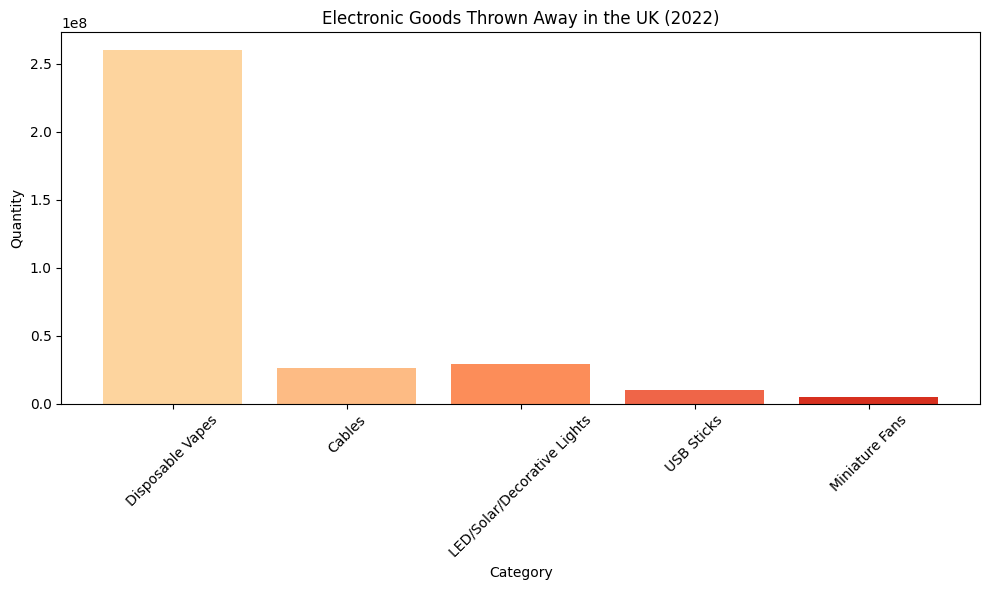

In [3]:
import matplotlib.pyplot as plt

categories = ['Disposable Vapes', 'Cables', 'LED/Solar/Decorative Lights', 'USB Sticks', 'Miniature Fans']
quantities = [260e6, 26e6, 29e6, 9.8e6, 4.8e6]
colors = ['#fdd49e', '#fdbb84', '#fc8d59', '#ef6548', '#d7301f']  

plt.figure(figsize=(10, 6))
plt.bar(categories, quantities, color=colors)
plt.title('Electronic Goods Thrown Away in the UK (2022)')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
